# First Look
## Make Basic Plots
August 31, 2020

In [1]:
import os, glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

import matplotlib.font_manager as font_manager

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')

%matplotlib inline

## Track 1

mrc_info: 온라인 가맹점 업종 정보  
samp_train: 회원의 1월달 온라인 가맹점 이용여부 데이터  
samp_cst_feat: 회원 특성 정보  
variable_dtype: 변수 데이터 타입 정보(메타 데이터)  

In [20]:
pathList = glob.glob('../../../raw/*')
for idx, p in enumerate(pathList[:4]):
    name = p.split(' ')[-1].split('.')[0]
    print(f'Load {name}')
    if idx < 3:
        globals()[name] = pd.read_csv(p, engine='python')
    else:
        globals()[name] = pd.read_excel(p)

Load mrc_info
Load samp_train
Load samp_cst_feat
Load variable_dtype


### samp_train
회원의 1월달 온라인 가맹점 이용여부 데이터
  
  
  
<u>Description</u>  
> cst_id_di: 고객관리번호(고객 식별 ID)  
MRC_ID_DI: 온라인 가맹점 번호(0: 온라인 가맹점 미이용)

#### 온라인 가맹점 별 고객 이용 Frequency

Text(0.5, 0.98, '온라인 가맹점별 이용현황')

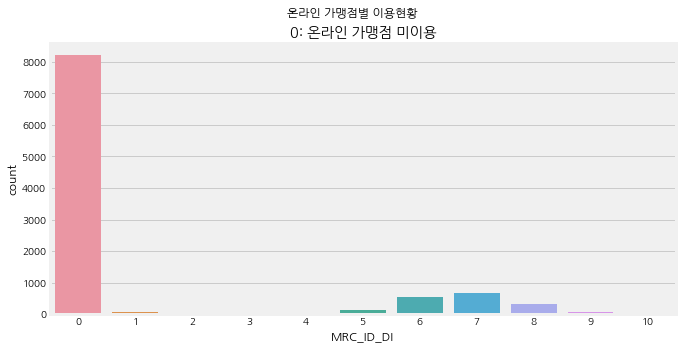

In [25]:
plt.figure(figsize=(10,5))
sns.countplot('MRC_ID_DI', data=samp_train)
plt.title('0: 온라인 가맹점 미이용')
plt.suptitle('온라인 가맹점별 이용현황')

Text(0.5, 0.98, '온라인 가맹점 이용 여부 Frequency')

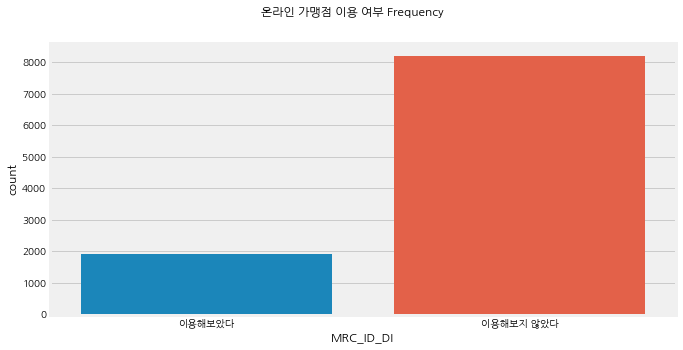

In [26]:
plt.figure(figsize=(10,5))
sns.countplot((samp_train['MRC_ID_DI'] == 0))
plt.xticks([0, 1], ['이용해보았다', '이용해보지 않았다'])
plt.suptitle('온라인 가맹점 이용 여부 Frequency')

온라인 가맹점을 사용해보지 않은 고객이 압도적으로 많음  
=> 어떤 온라인 가맹점을 사용했는지 예측해보기에 앞서, 온라인 가맹점을 이용했는지 하지 않았는지에 대한 예측을 하는 방향도 생각해보자

Text(0.5, 0.98, '온라인 가맹점별 고객 이용 Frequency')

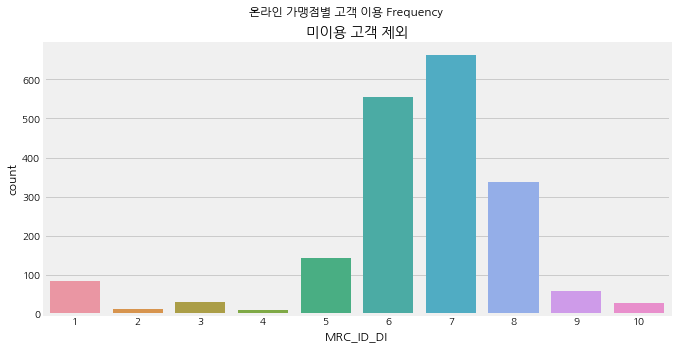

In [27]:
plt.figure(figsize=(10,5))
sns.countplot('MRC_ID_DI', data=samp_train[samp_train['MRC_ID_DI'] != 0])
plt.title('미이용 고객 제외')
plt.suptitle('온라인 가맹점별 고객 이용 Frequency')

가맹점 이용 빈도 수는 7 > 6 >> 8 >> 5 ... 순으로 높다

### samp_cst_feat
회원 특성 정보
<u>Description</u>
> cst_id_di: 고개관리번호(고객 식별 ID)  
V002-V228: 회원 특성 변수

In [28]:
missingRate = samp_cst_feat.isnull().sum() / samp_cst_feat.shape[0]
if missingRate[missingRate > 0].tolist():
    display(missingRate[missingRate > 0])
else:
    print('결측값 없음')

결측값 없음


#### VAR: Numeric

In [29]:
varNums = variable_dtype[variable_dtype['dType']=='numerical']['Variable_Name'].tolist()

def showDist_numVAR(group=None, complement=False, save=False, figsize=None):
    """
    group: list, 입력하고자 하는 가맹점 방문 category(MRC_ID_DI)
    complement: boolean, True면 입력한 방문 가맹점 이외의 나머지 가맹점을 대상으로 visualization
    figsize: figure size of pyplot
    """
    if group is None:
        group = []
    if figsize is None:
        figsize = (20, 20)
    if group:
        if complement:
            temp = samp_train[~samp_train['MRC_ID_DI'].isin(group)]['cst_id_di']
            f, ax = plt.subplots(15, 14, figsize=figsize)
            row = 0
            for i, var in enumerate(varNums):
                if i==0:
                    sns.distplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][varNums[i]]), 
                                  ax=ax[row, i])
                else:
                    if i % 14 == 0:
                        row += 1
                    sns.distplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][varNums[i]]), 
                                  ax=ax[row, i - row*14])
            plt.tight_layout()
            if save:
                groupName = ''.join([str(g) for g in group])
                plt.savefig('./plots/VAR_Numeric_cst_except' + groupName + '.png', dpi=300)
            
        else:
            temp = samp_train[samp_train['MRC_ID_DI'].isin(group)]['cst_id_di']
            f, ax = plt.subplots(15, 14, figsize=figsize)
            row = 0
            for i, var in enumerate(varNums):
                if i==0:
                    sns.distplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][varNums[i]]), 
                                  ax=ax[row, i])
                else:
                    if i % 14 == 0:
                        row += 1
                    sns.distplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][varNums[i]]), 
                                  ax=ax[row, i - row*14])
            plt.tight_layout()
            if save:
                groupName = ''.join([str(g) for g in group])
                plt.savefig('./plots/VAR_Numeric_cst' + groupName + '.png', dpi=300)
    else:
        f, ax = plt.subplots(15, 14, figsize=figsize)
        row = 0
        for i, var in enumerate(varNums):
            if i==0:
                sns.distplot(samp_cst_feat[varNums[i]], ax=ax[row, i])
            else:
                if i % 14 == 0:
                    row += 1
                sns.distplot(samp_cst_feat[varNums[i]], ax=ax[row, i - row*14])
        plt.tight_layout()
        if save:
            plt.savefig('./plots/VAR_Numeric.png', dpi=300)
#     return f

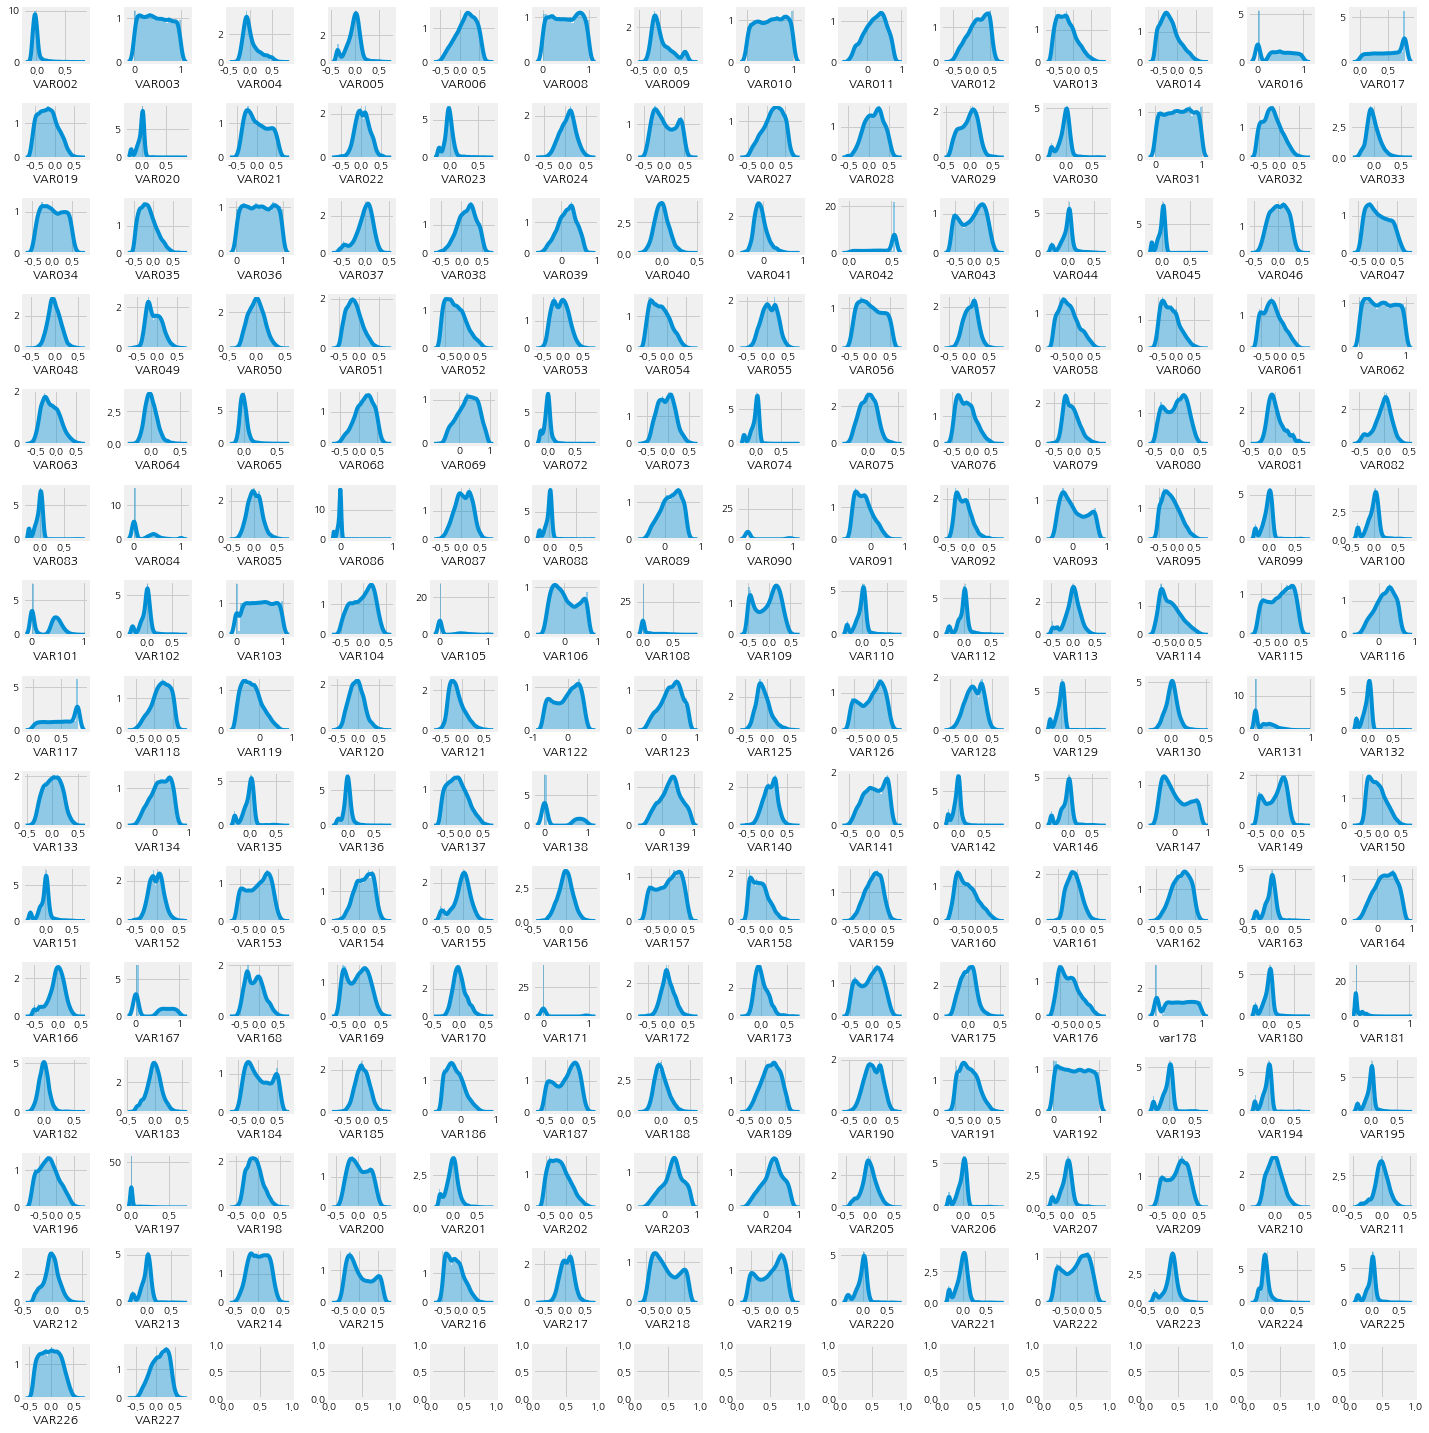

In [30]:
# all
showDist_numVAR(save=True)

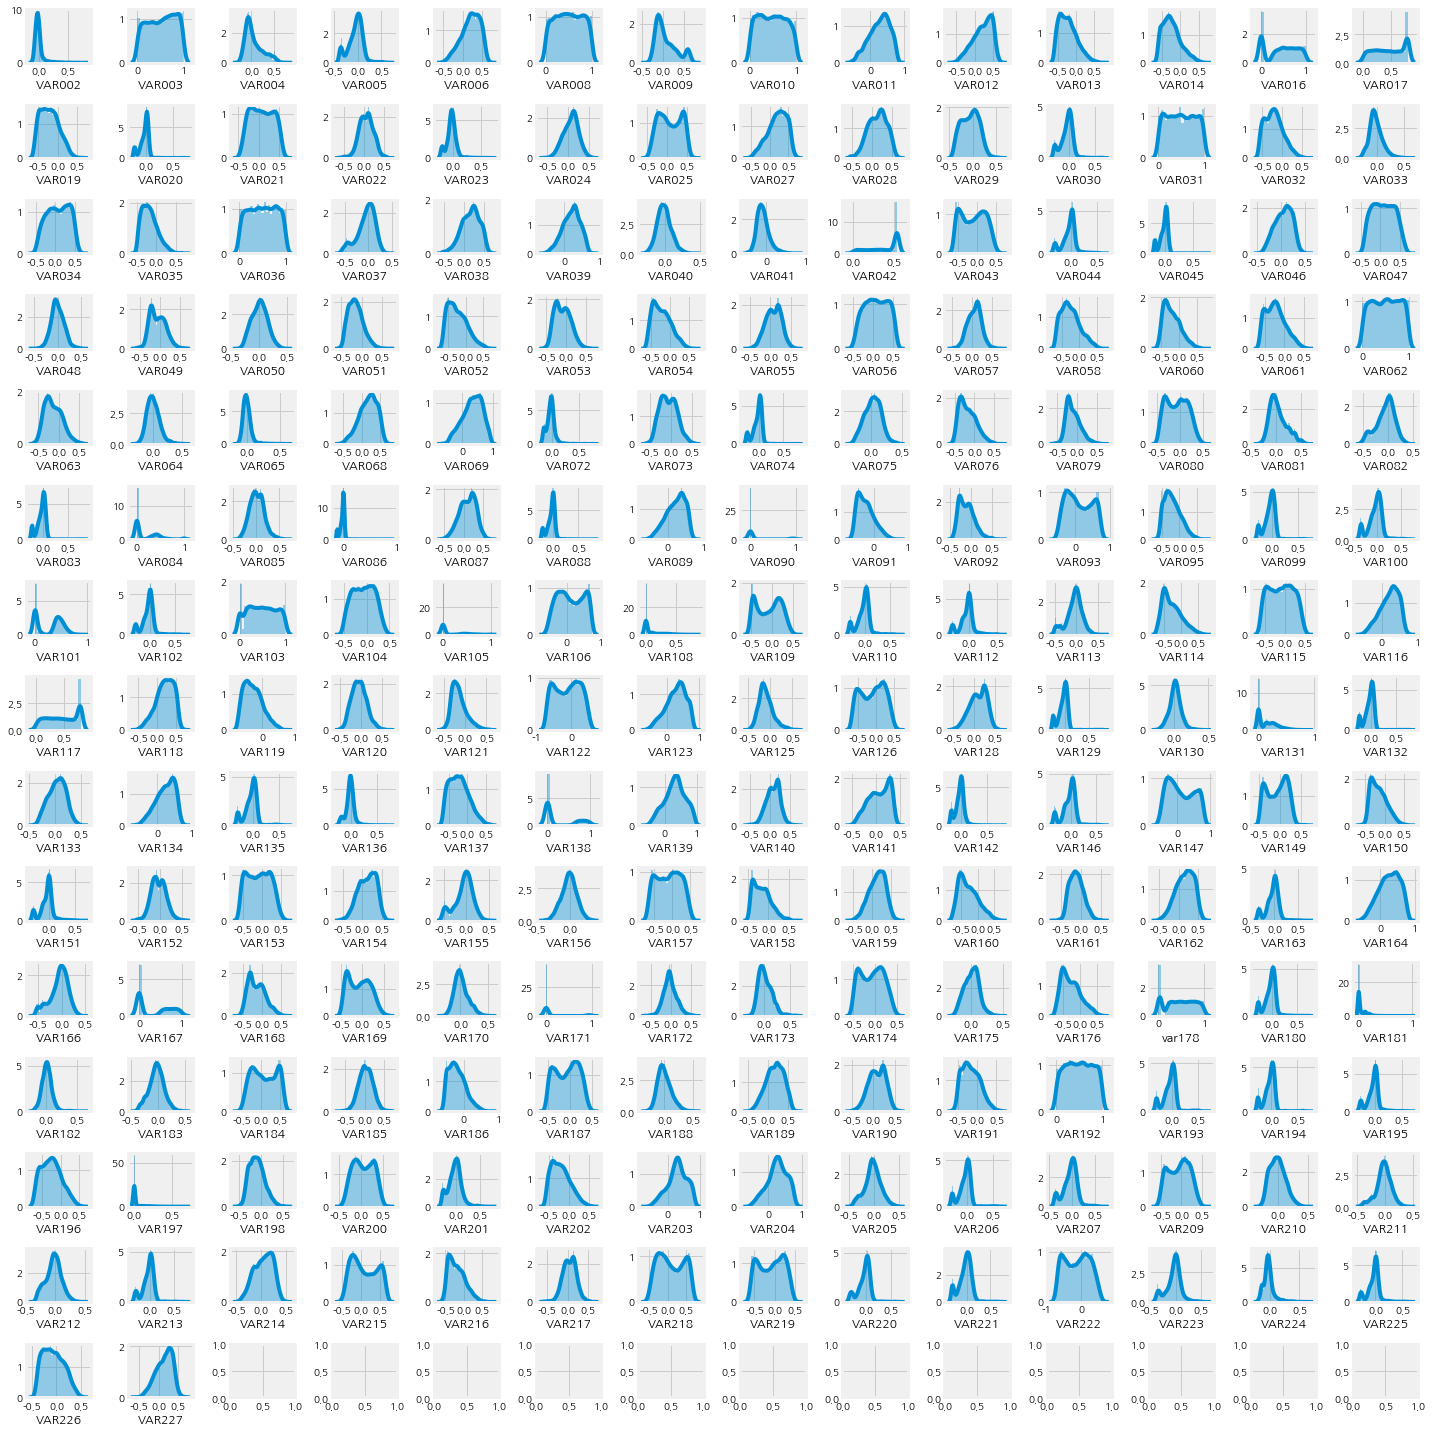

In [31]:
# 온라인 가맹점 미 이용자 대상
showDist_numVAR(group=[0], save=True)

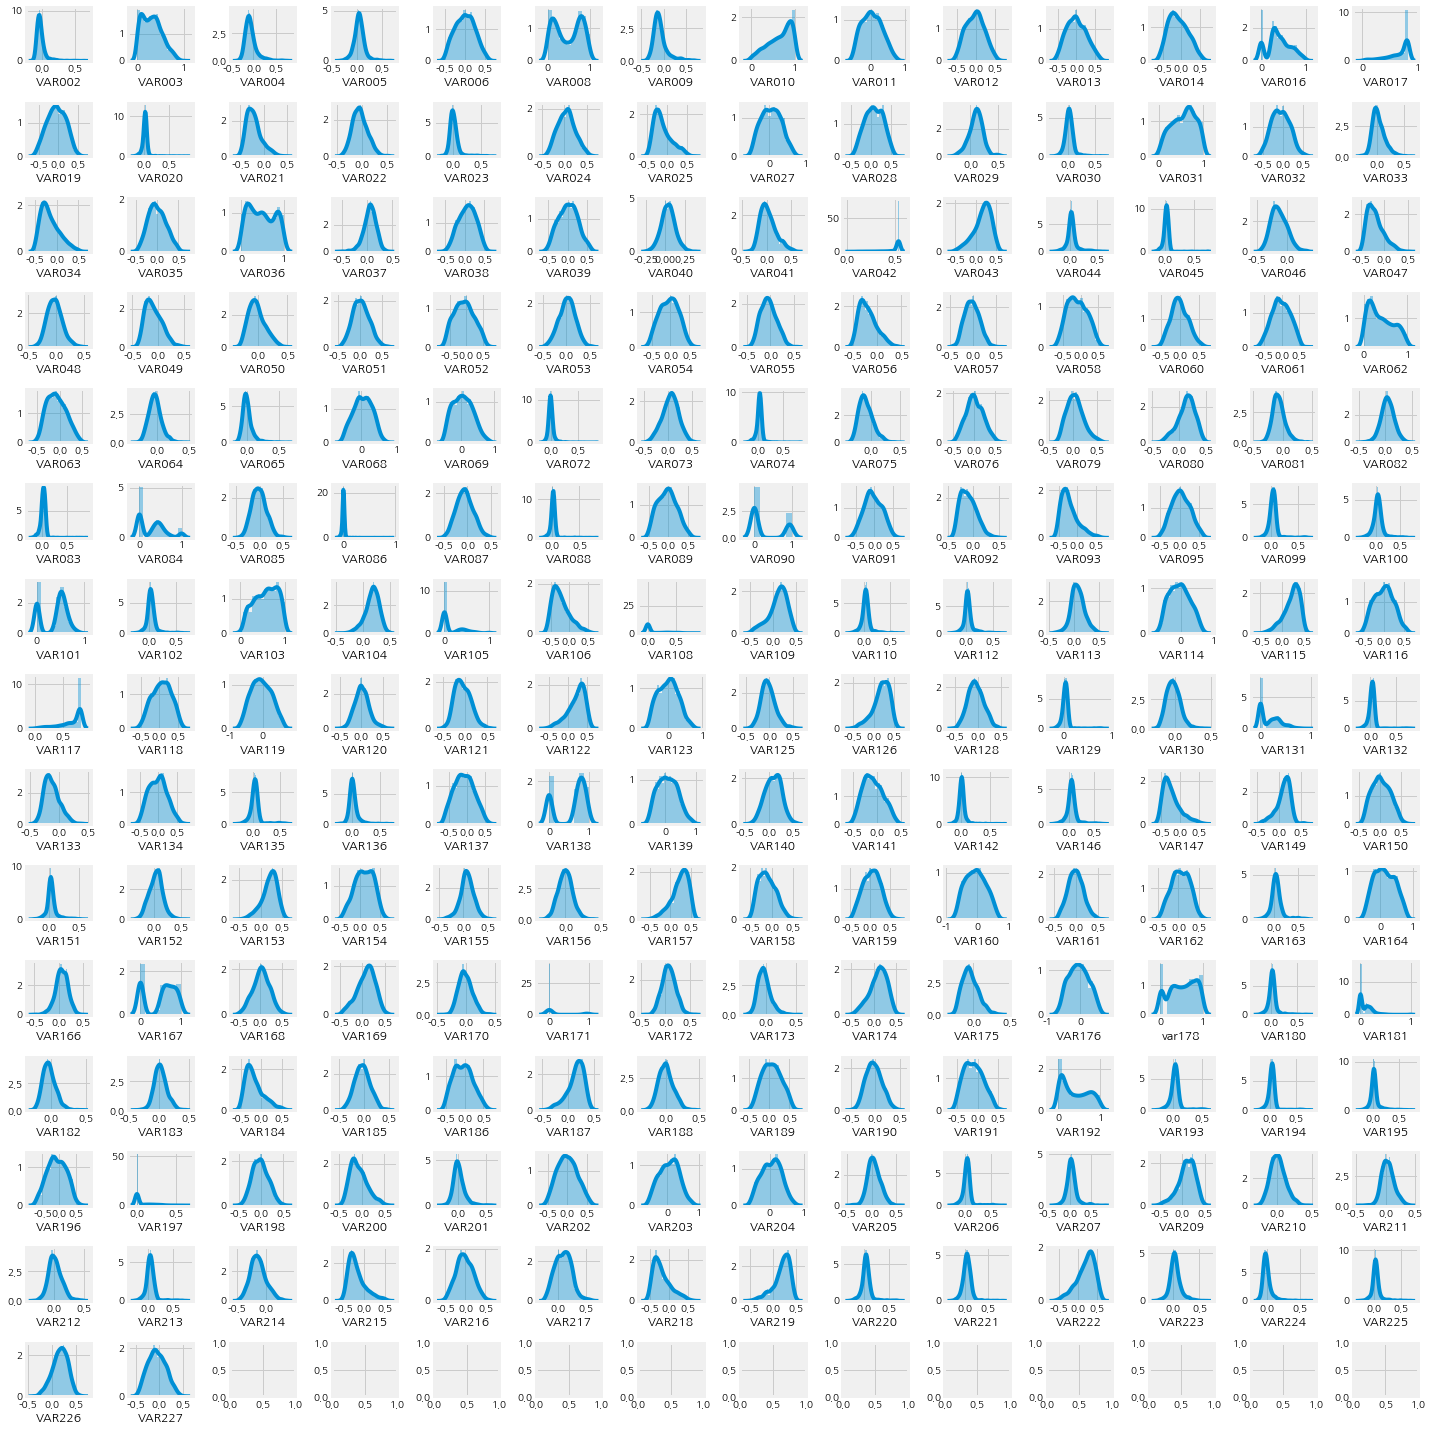

In [32]:
# 온라인 가맹점 미 이용자 대상
showDist_numVAR(group=[0], save=True, complement=True)

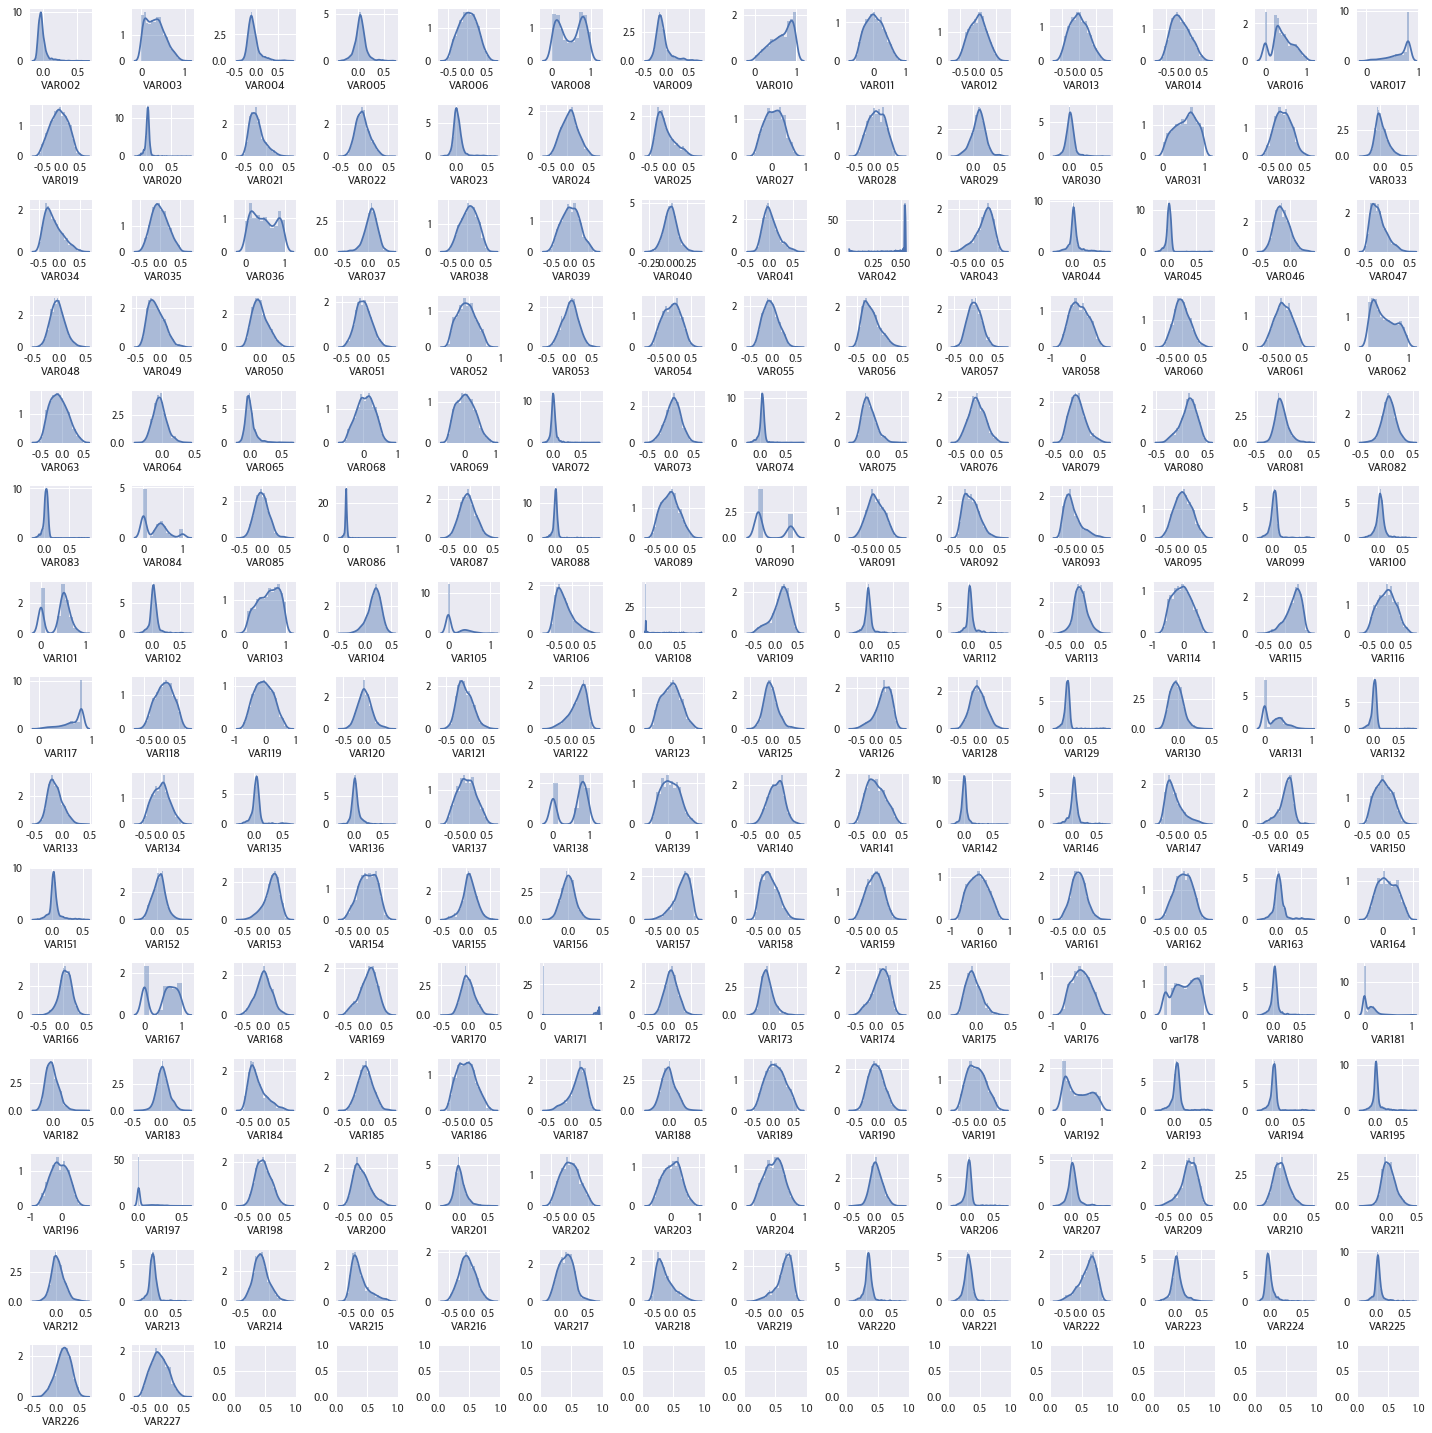

In [42]:
# 6, 7, 8 가맹점 방문자 대상
showDist_numVAR(group=[6,7,8], save=True)

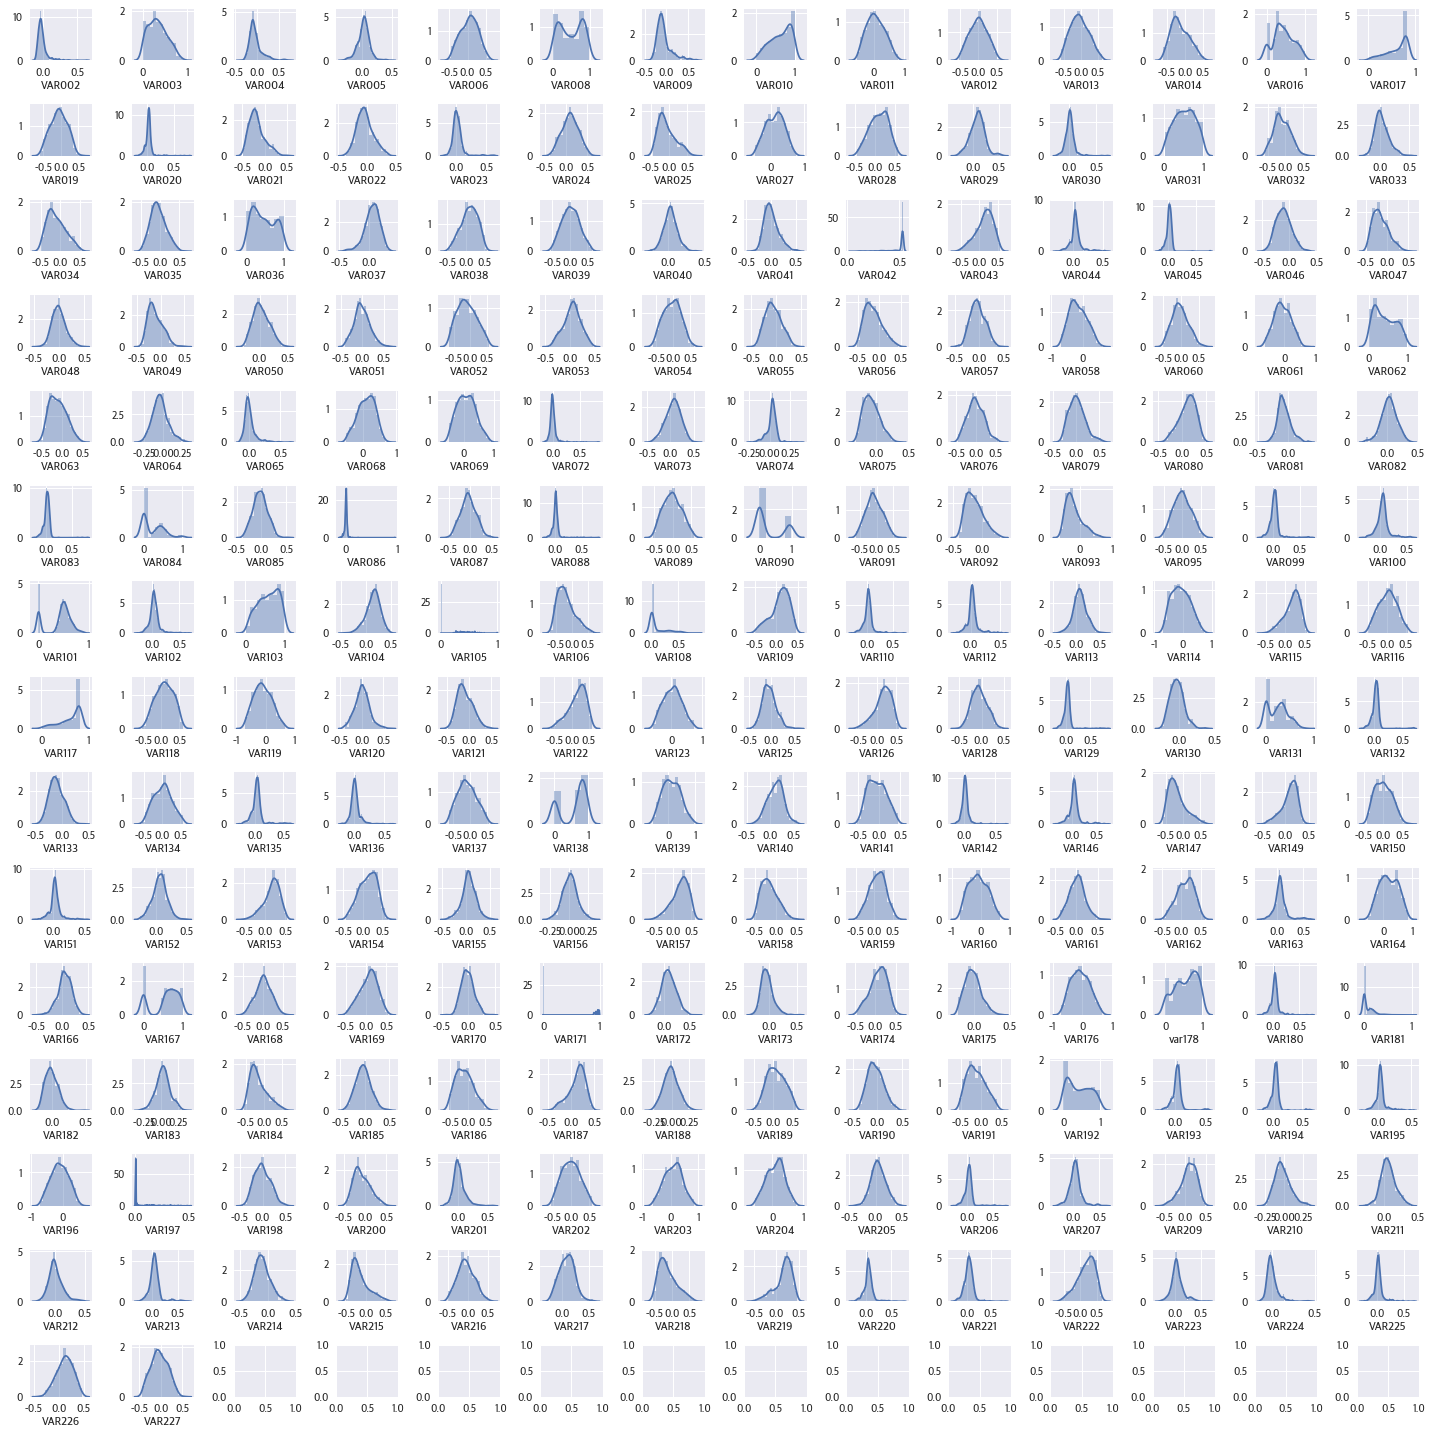

In [71]:
# 6 가맹점 방문자 대상
showDist_numVAR(group=[6], save=True)

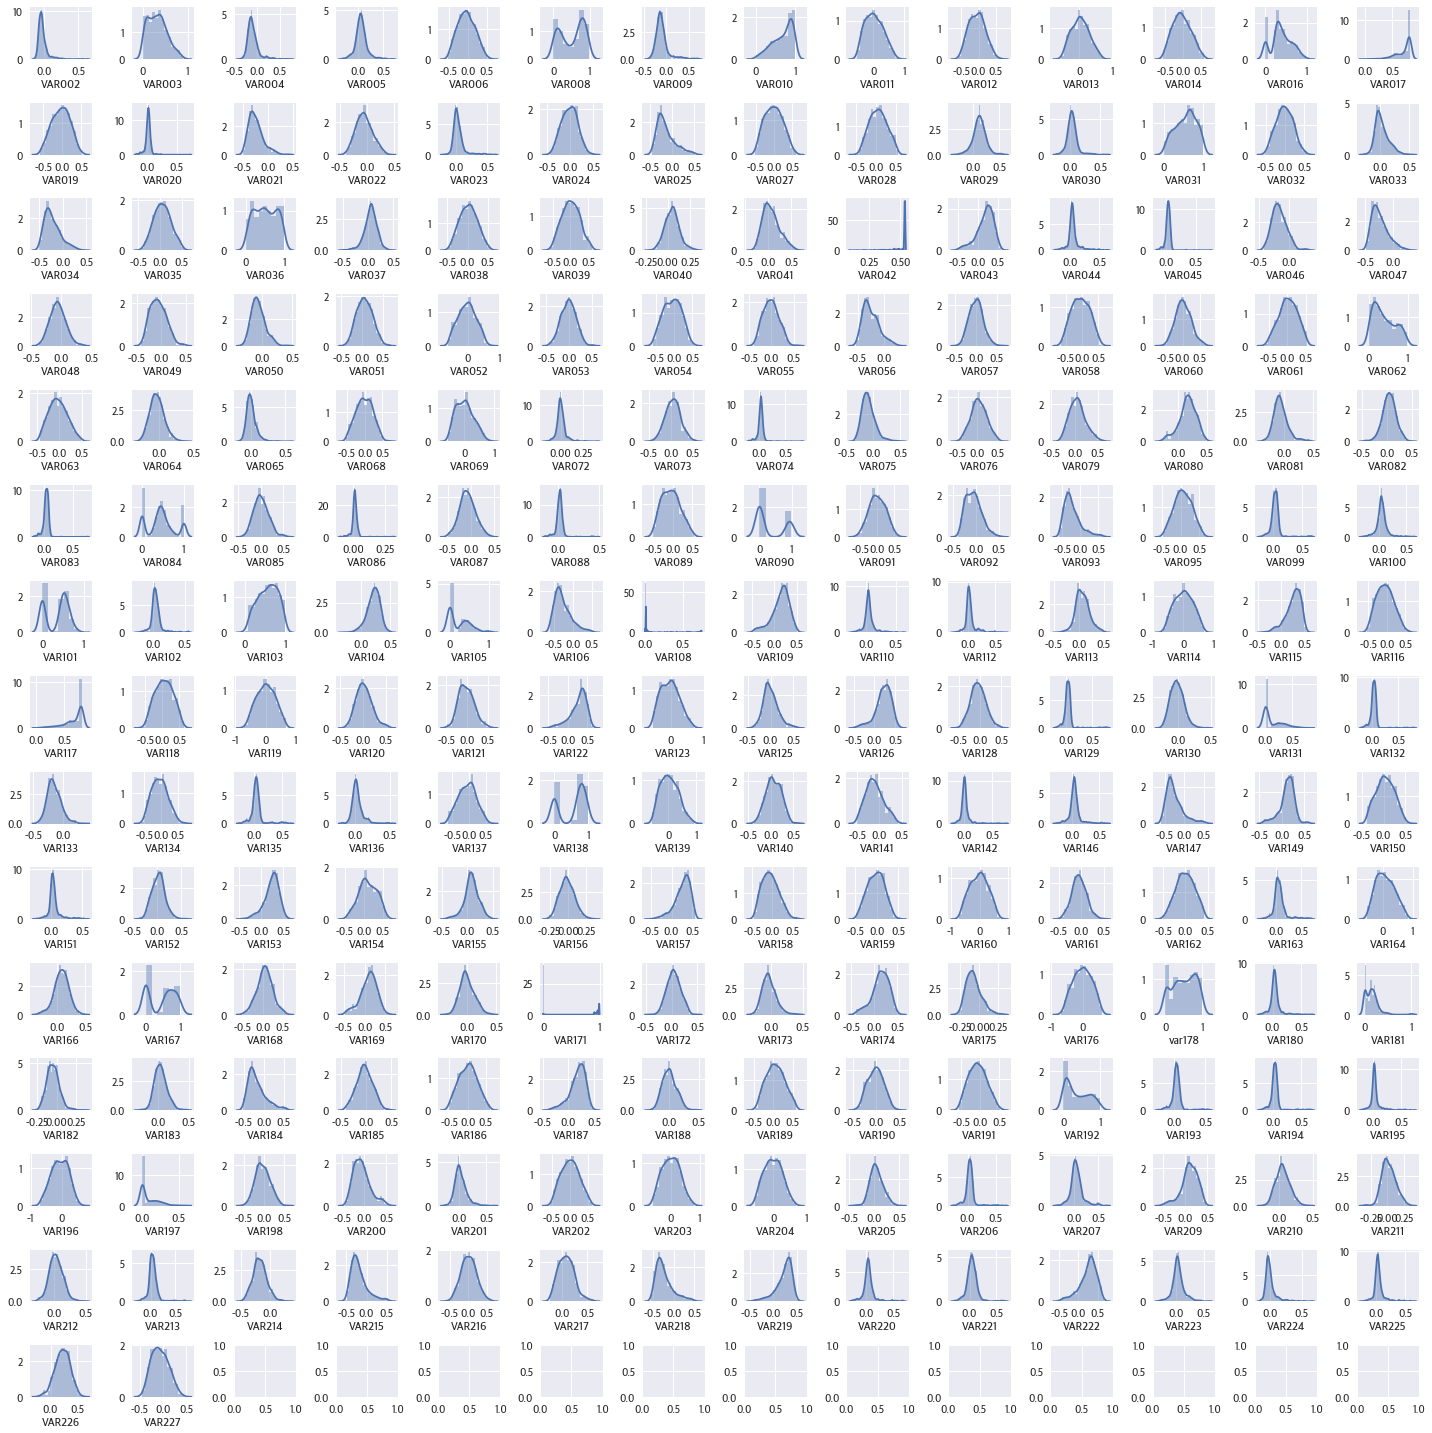

In [57]:
# 7 가맹점 방문자 대상
showDist_numVAR(group=[7], save=True)

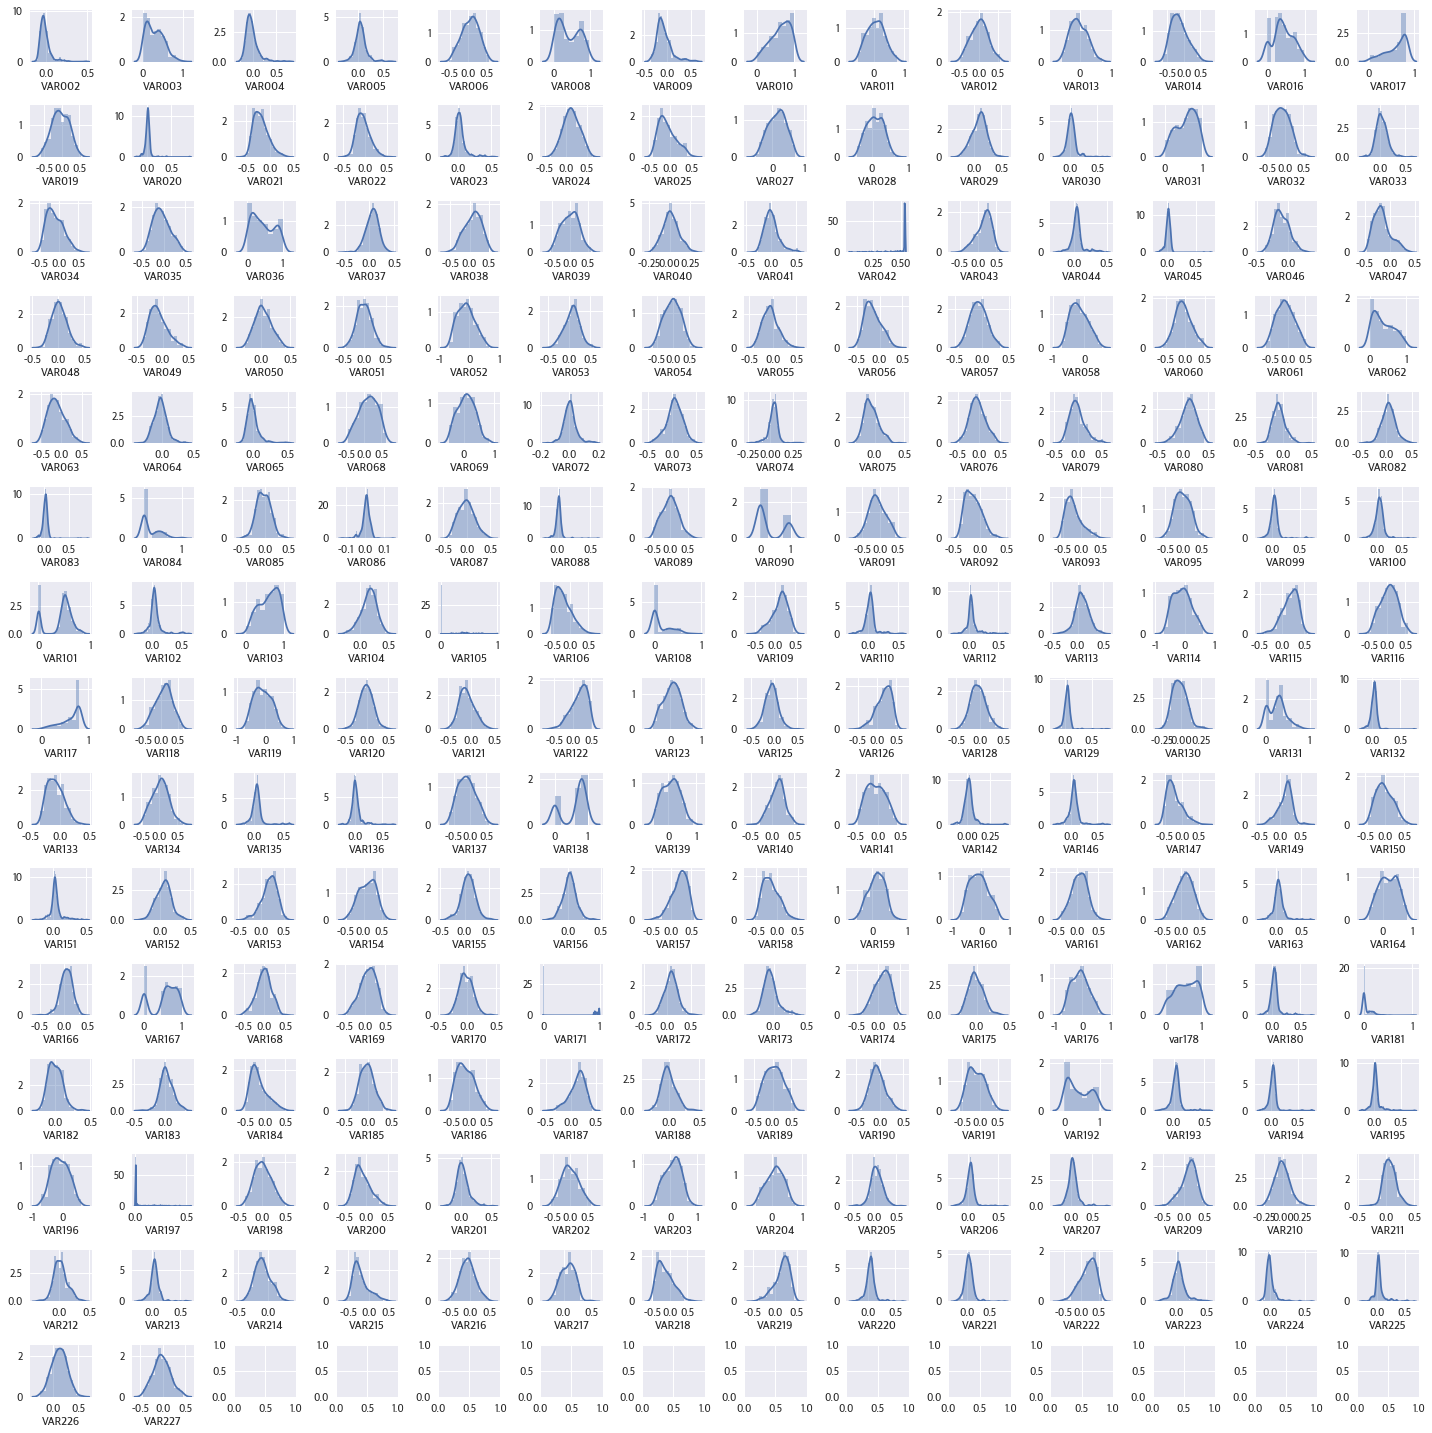

In [72]:
# 8 가맹점 방문자 대상
showDist_numVAR(group=[8], save=True)

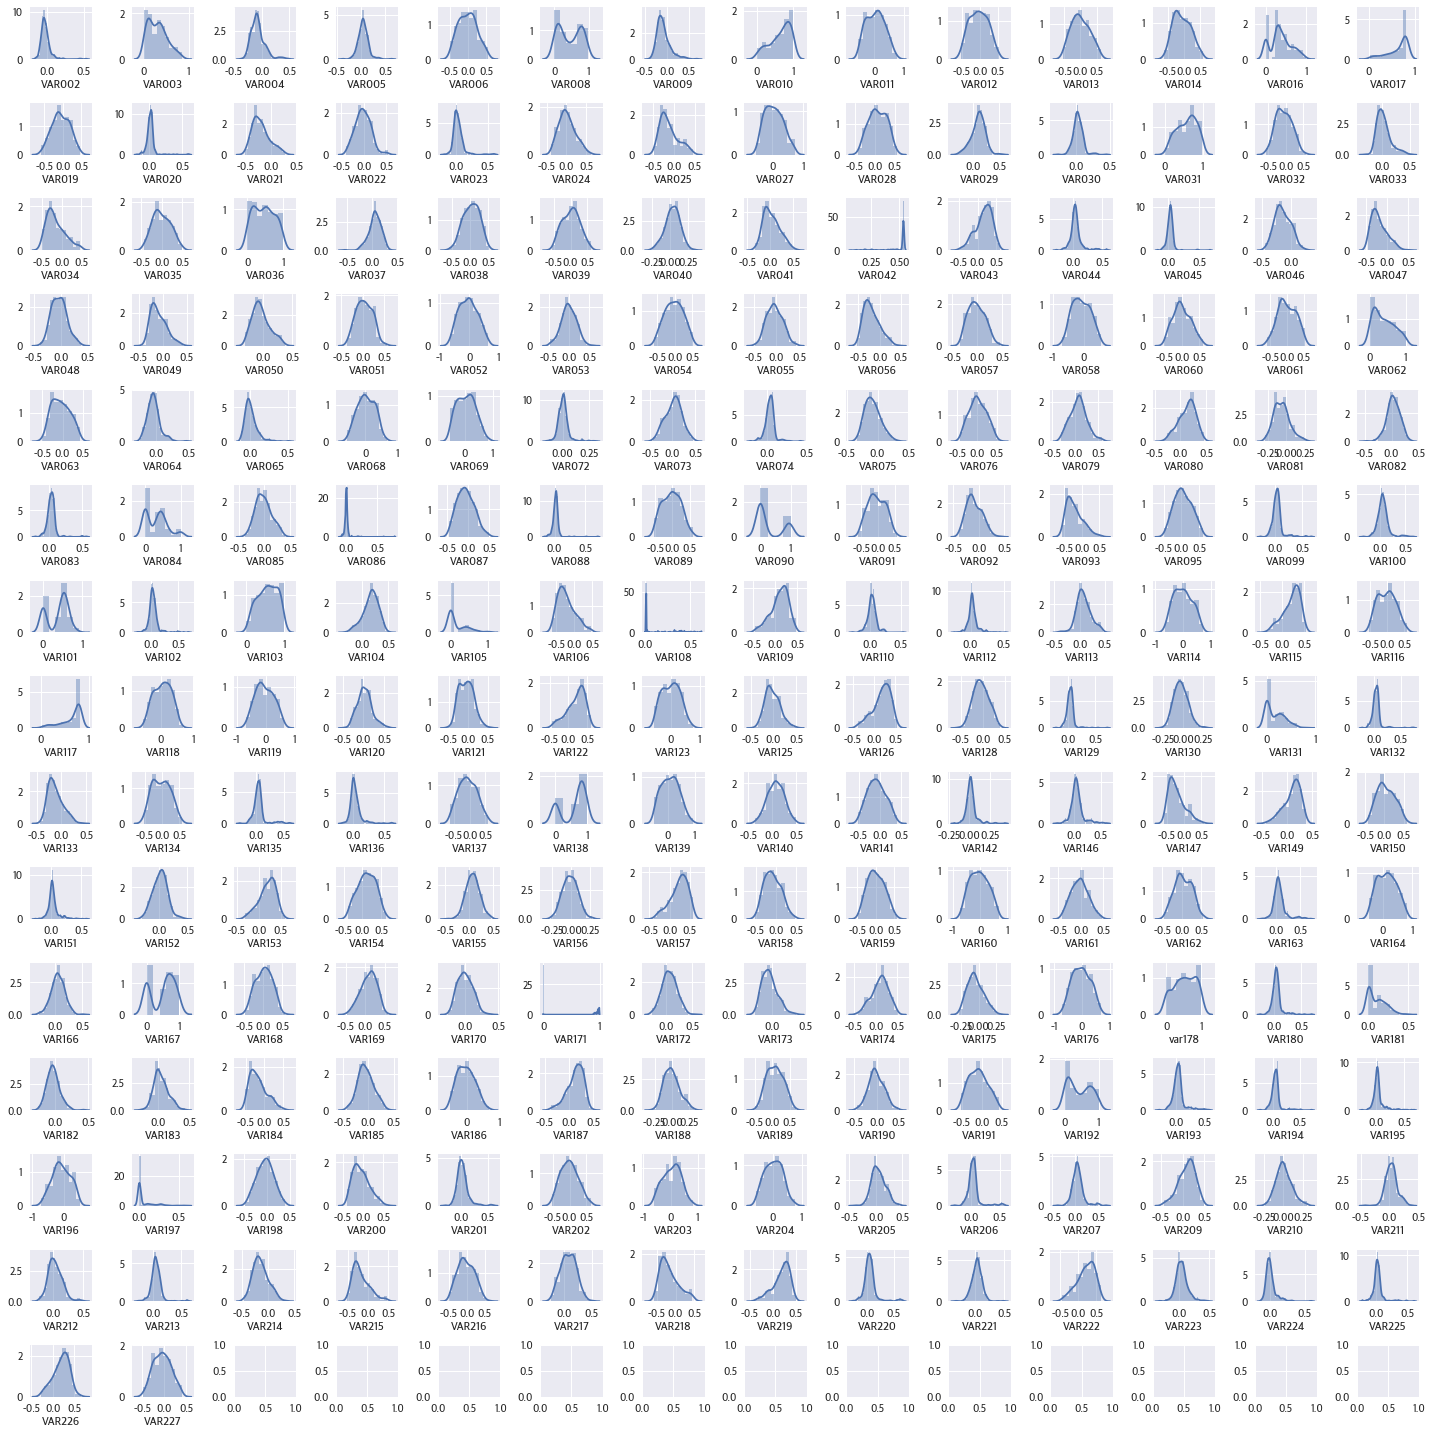

In [43]:
# 1, 5, 9 가맹점 방문자 대상
showDist_numVAR(group=[1,5,9], save=True)

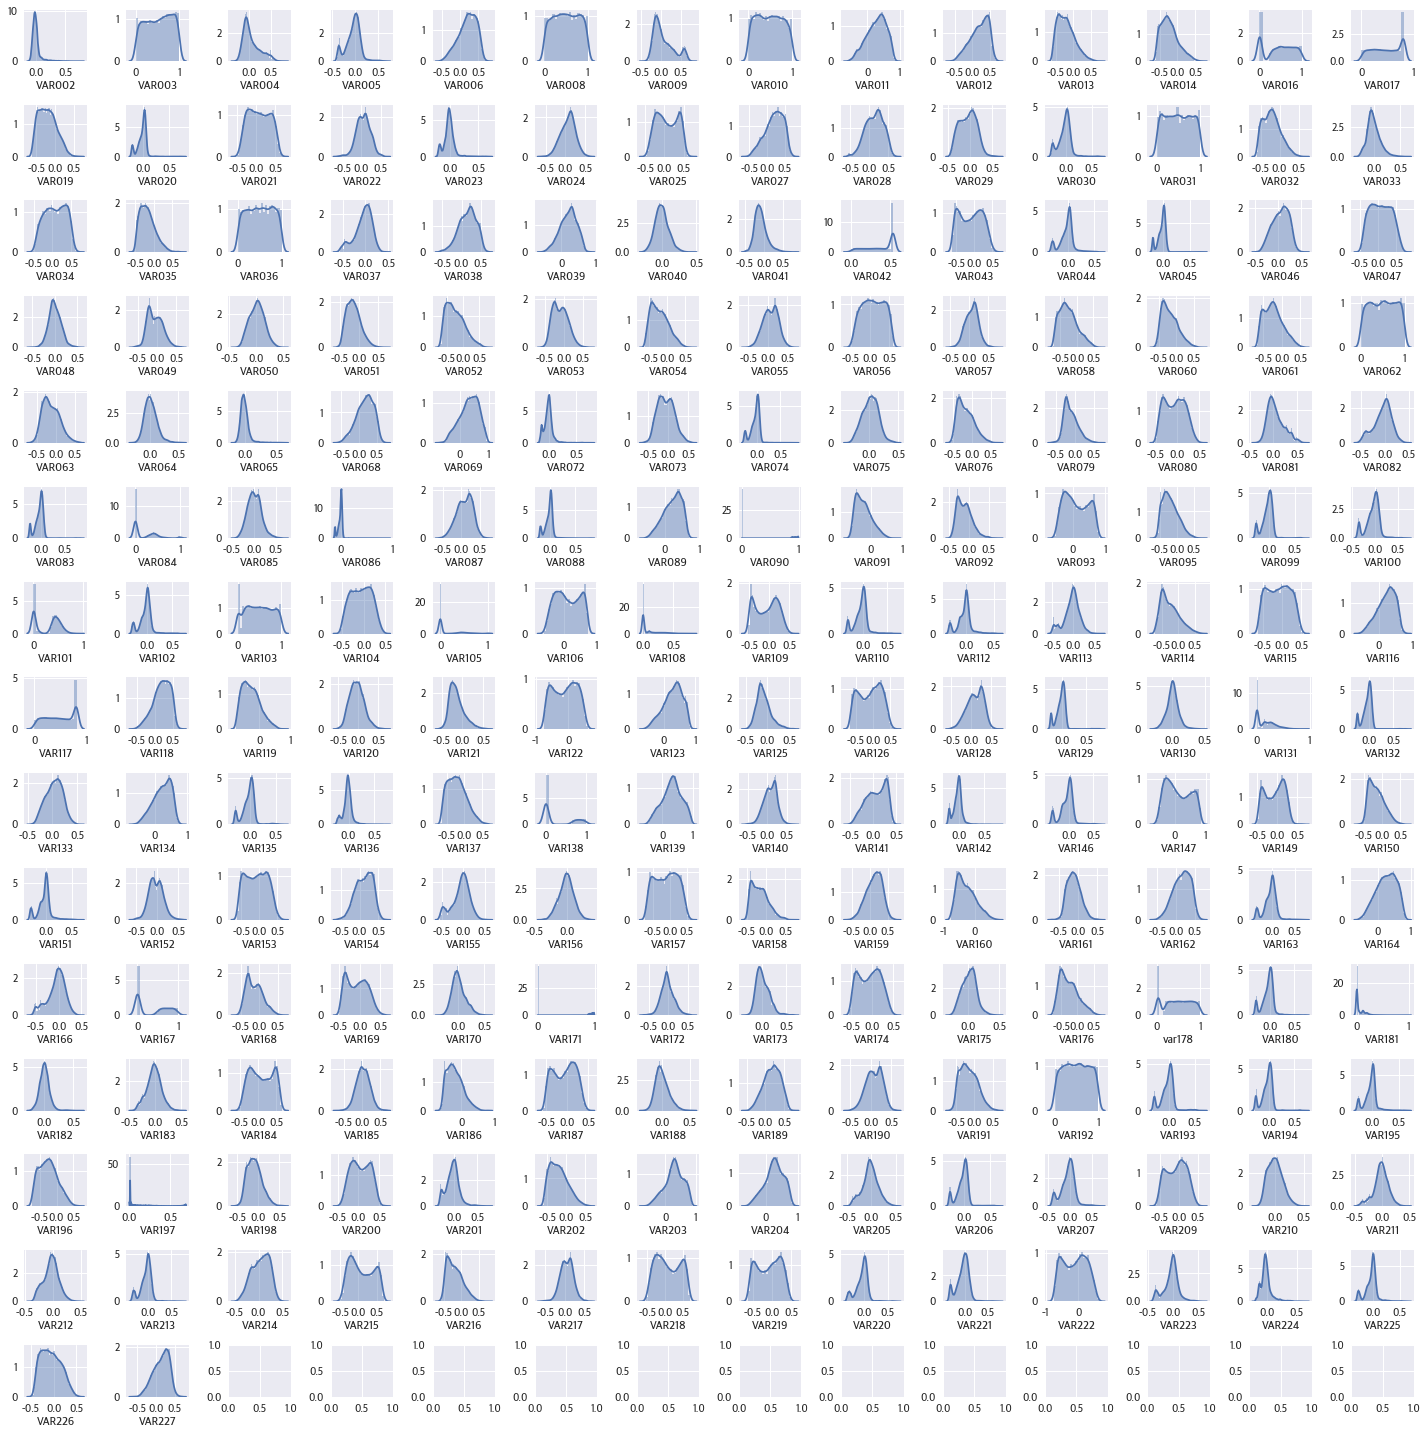

In [46]:
# 1, 5, 6, 7, 8, 9 가맹점 이외 방문자 대상
showDist_numVAR(group=[1,5,6,7,8,9], save=True, complement=True)

#### VAR: Categorical

In [7]:
varCats = variable_dtype[variable_dtype['dType']=='categorical']['Variable_Name'].tolist()

def showDist_VARcat(group=None, complement=False, save=False, figsize=None):
    if group is None:
        group = []
    if figsize is None:
        figsize = (20, 20)
    if group:
        if complement:
            temp = samp_train[~samp_train['MRC_ID_DI'].isin(group)]['cst_id_di']
            f, ax = plt.subplots(6, 5, figsize=figsize)
            row = 0
            for i, var in enumerate(varCats):
                if i==0:
                    sns.countplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][var]), 
                                  ax=ax[row, i])
                else:
                    if i % 5 == 0:
                        row += 1
                    sns.countplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][var]), 
                                  ax=ax[row, i - row*5])
            plt.tight_layout()
            if save:
                groupName = ''.join([str(g) for g in group])
                plt.savefig('./plots/VAR_Categorical_cst_except' + groupName + '.png', dpi=300)
            
        else:
            temp = samp_train[samp_train['MRC_ID_DI'].isin(group)]['cst_id_di']
            f, ax = plt.subplots(6, 5, figsize=figsize)
            row = 0
            for i, var in enumerate(varCats):
                if i==0:
                    sns.countplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][var]), 
                                  ax=ax[row, i])
                else:
                    if i % 5 == 0:
                        row += 1
                    sns.countplot((samp_cst_feat[
                                  samp_cst_feat['cst_id_di']
                                  .isin(temp)
                                  ][var]), 
                                  ax=ax[row, i - row*5])
            plt.tight_layout()
            if save:
                groupName = ''.join([str(g) for g in group])
                plt.savefig('./plots/VAR_Categorical_cst' + groupName + '.png', dpi=300)
        
    else:
        f, ax = plt.subplots(6, 5, figsize=(20,20))
        row = 0
        for i, var in enumerate(varCats):
            if i==0:
                sns.countplot(samp_cst_feat[var], ax=ax[row, i])
            else:
                if i % 5 == 0:
                    row += 1
                sns.countplot(samp_cst_feat[var], ax=ax[row, i - row*5])
        plt.tight_layout()
        if save:
            plt.savefig('./plots/VAR_Categorical.png', dpi=300)

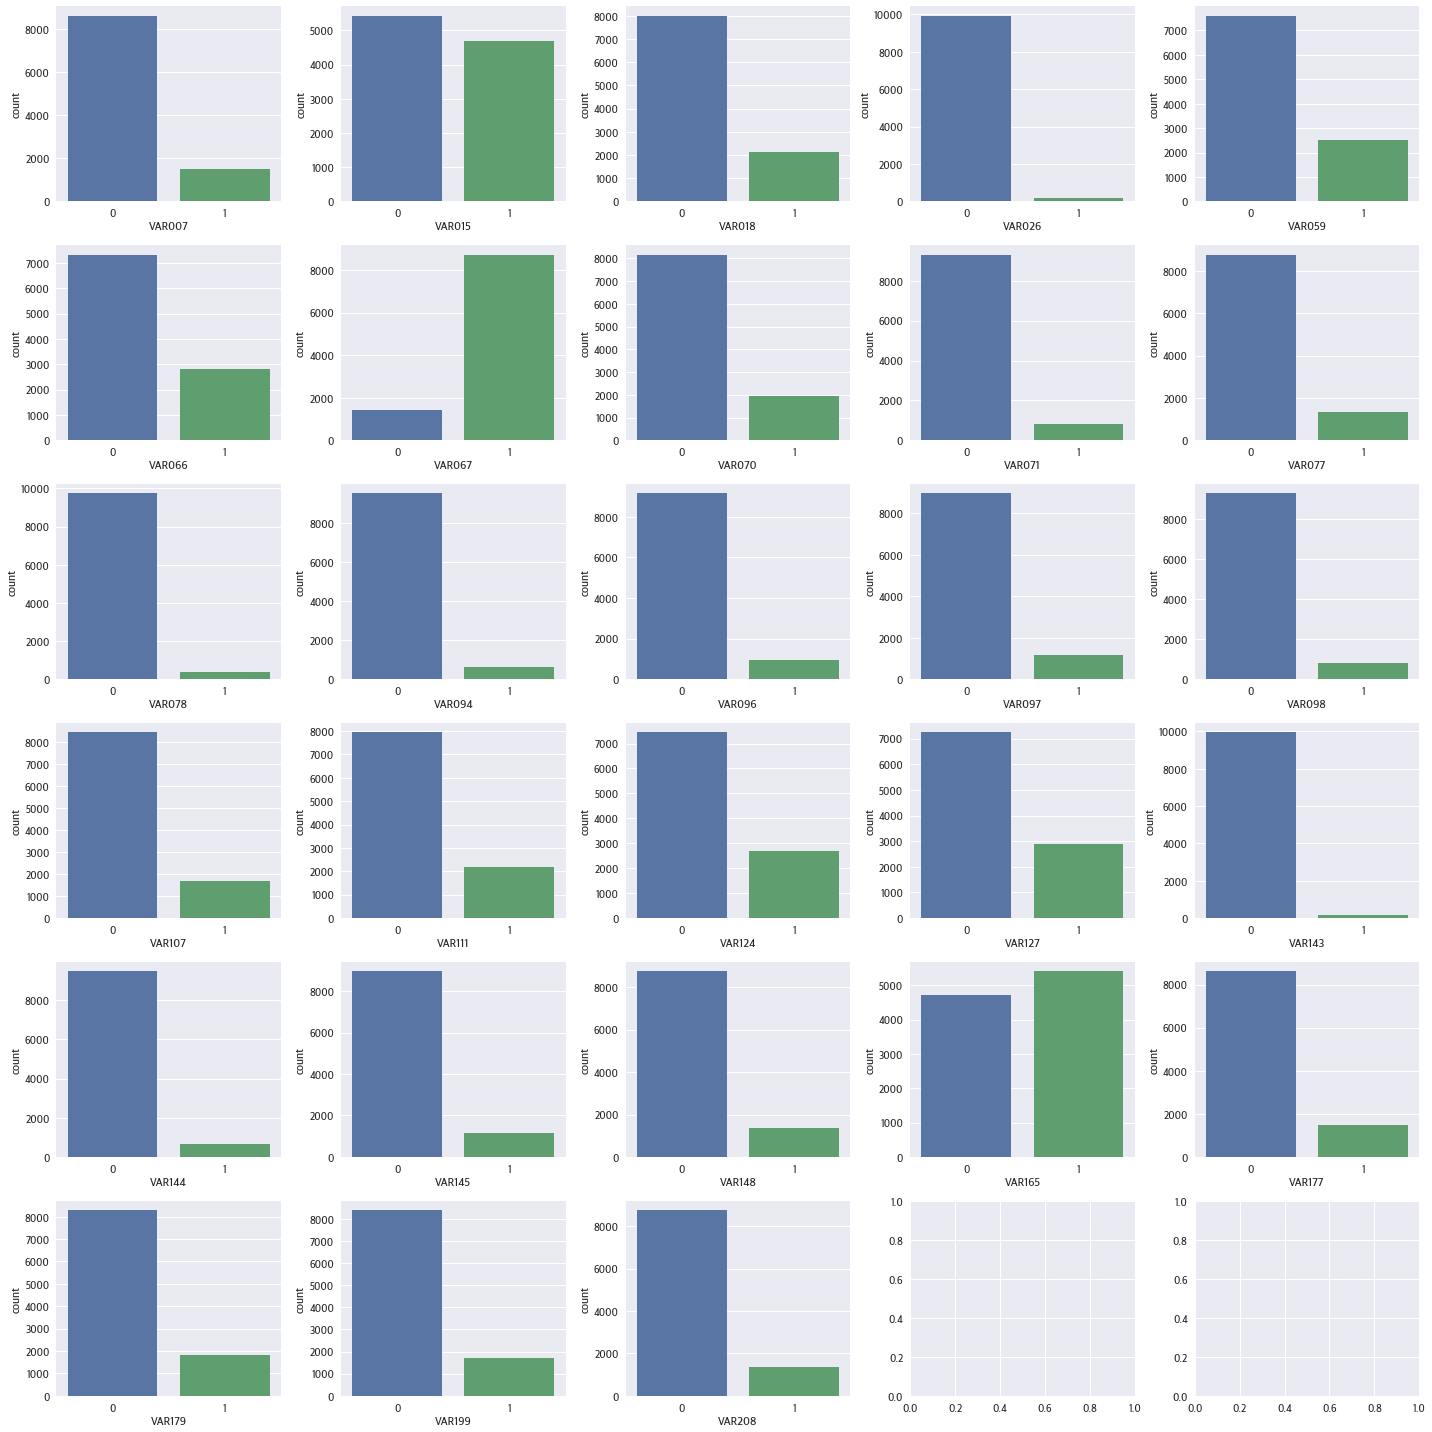

In [56]:
showDist_VARcat(save=True)

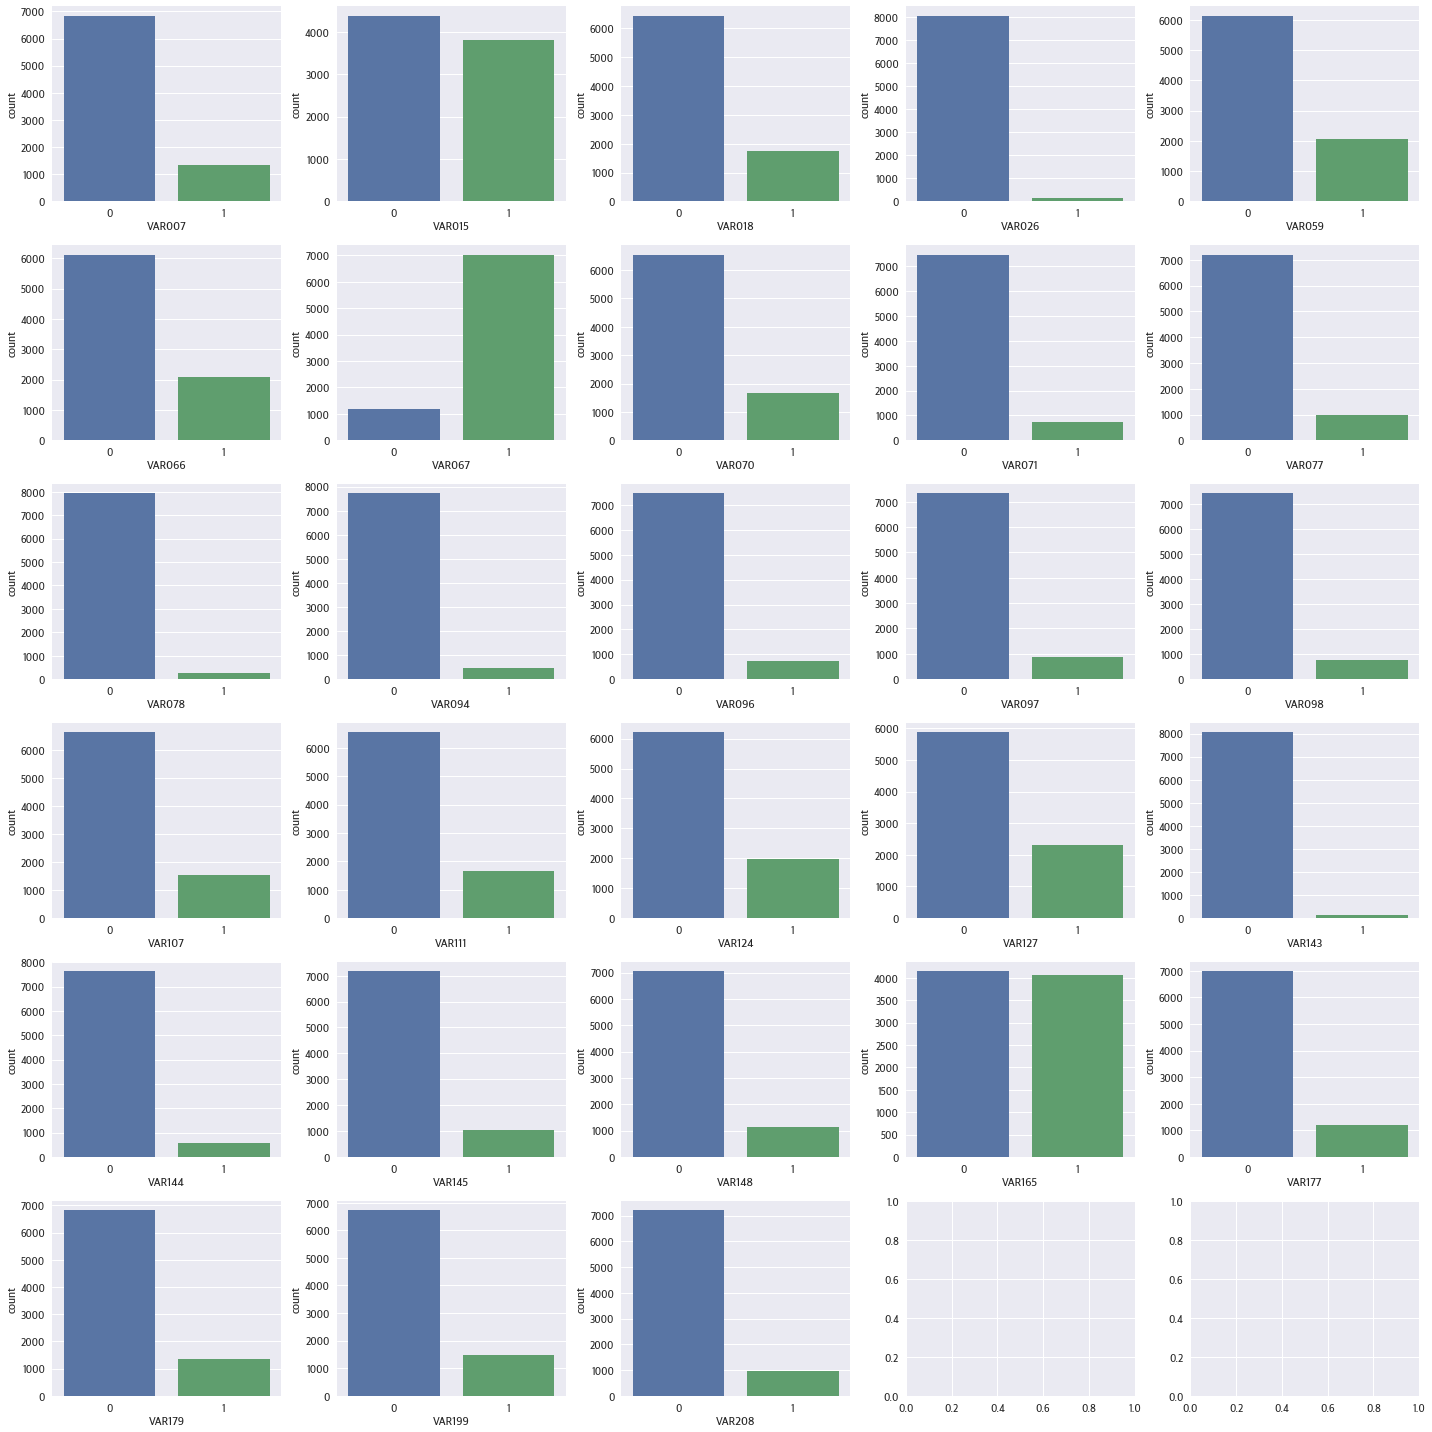

In [9]:
showDist_VARcat(group=[0], save=True)

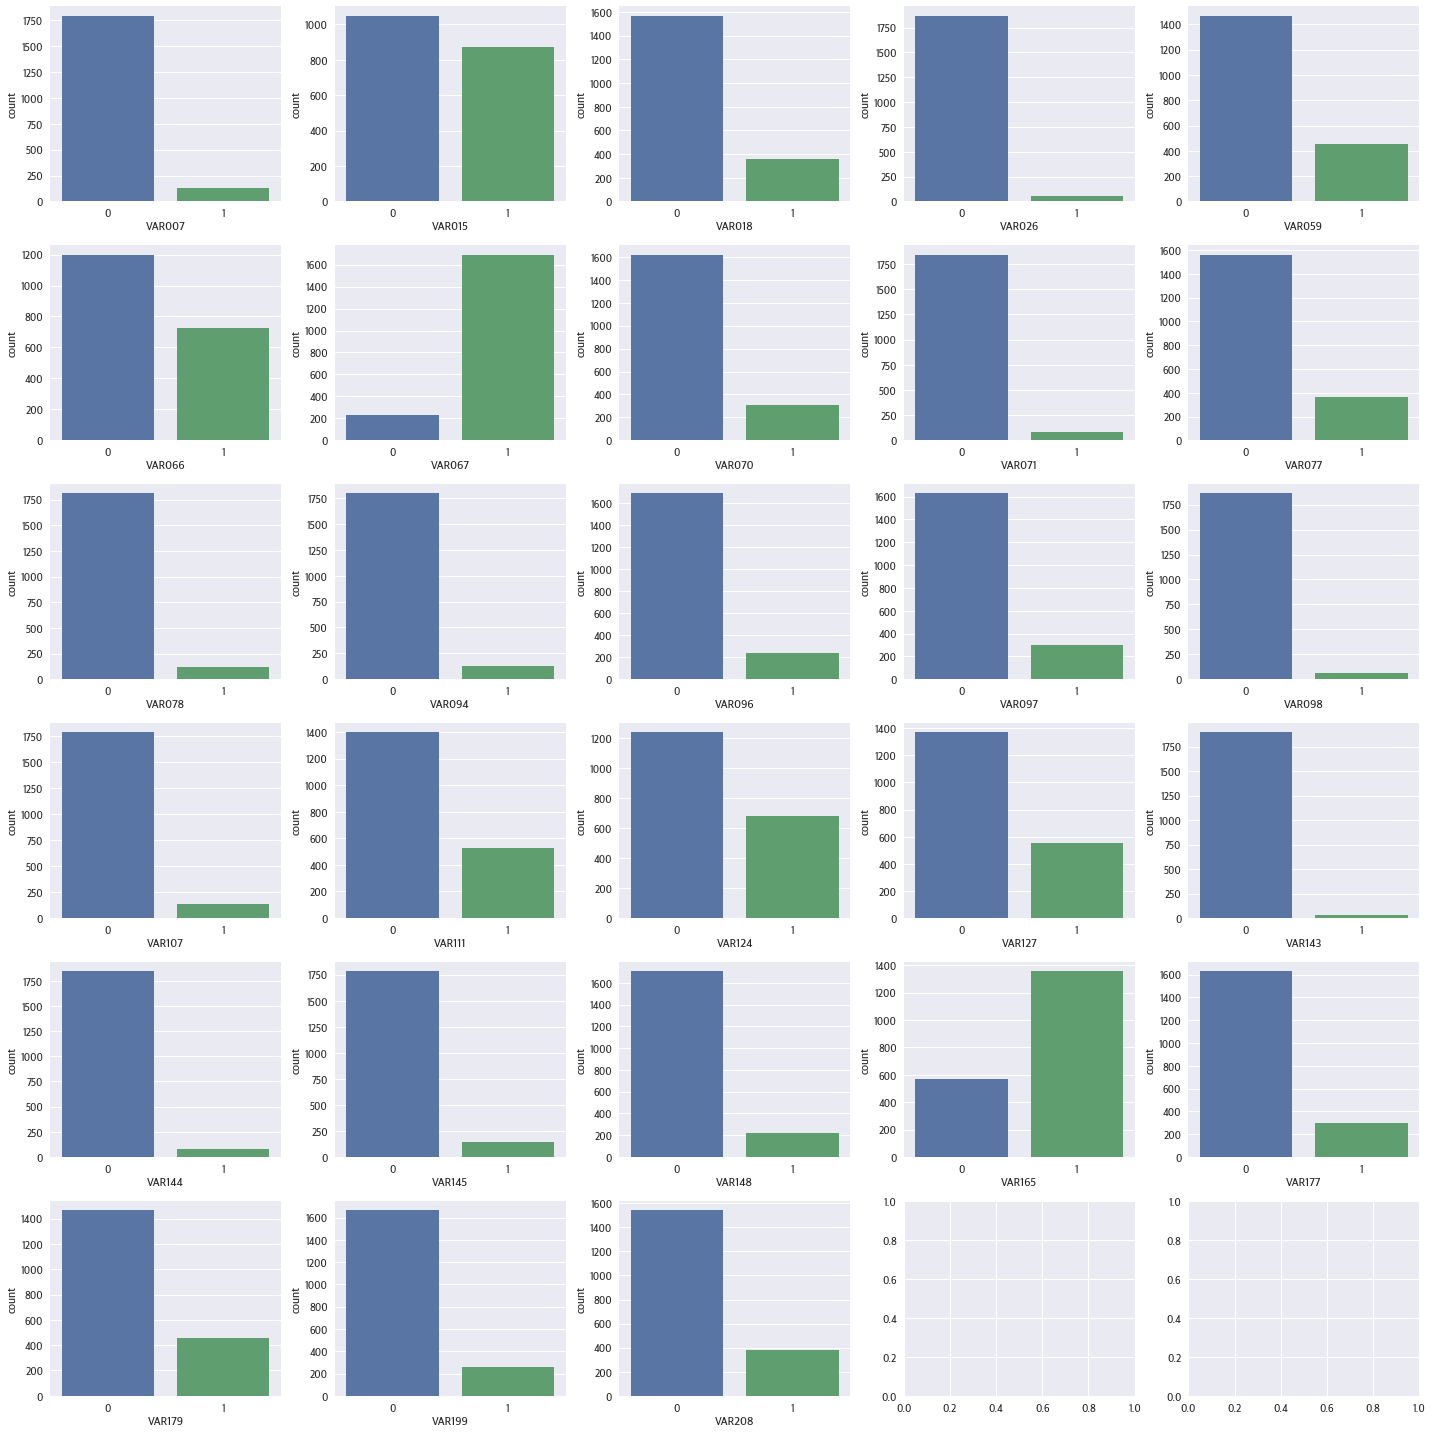

In [8]:
# 이용 고객 대상
showDist_VARcat(group=[0], save=True, complement=True)

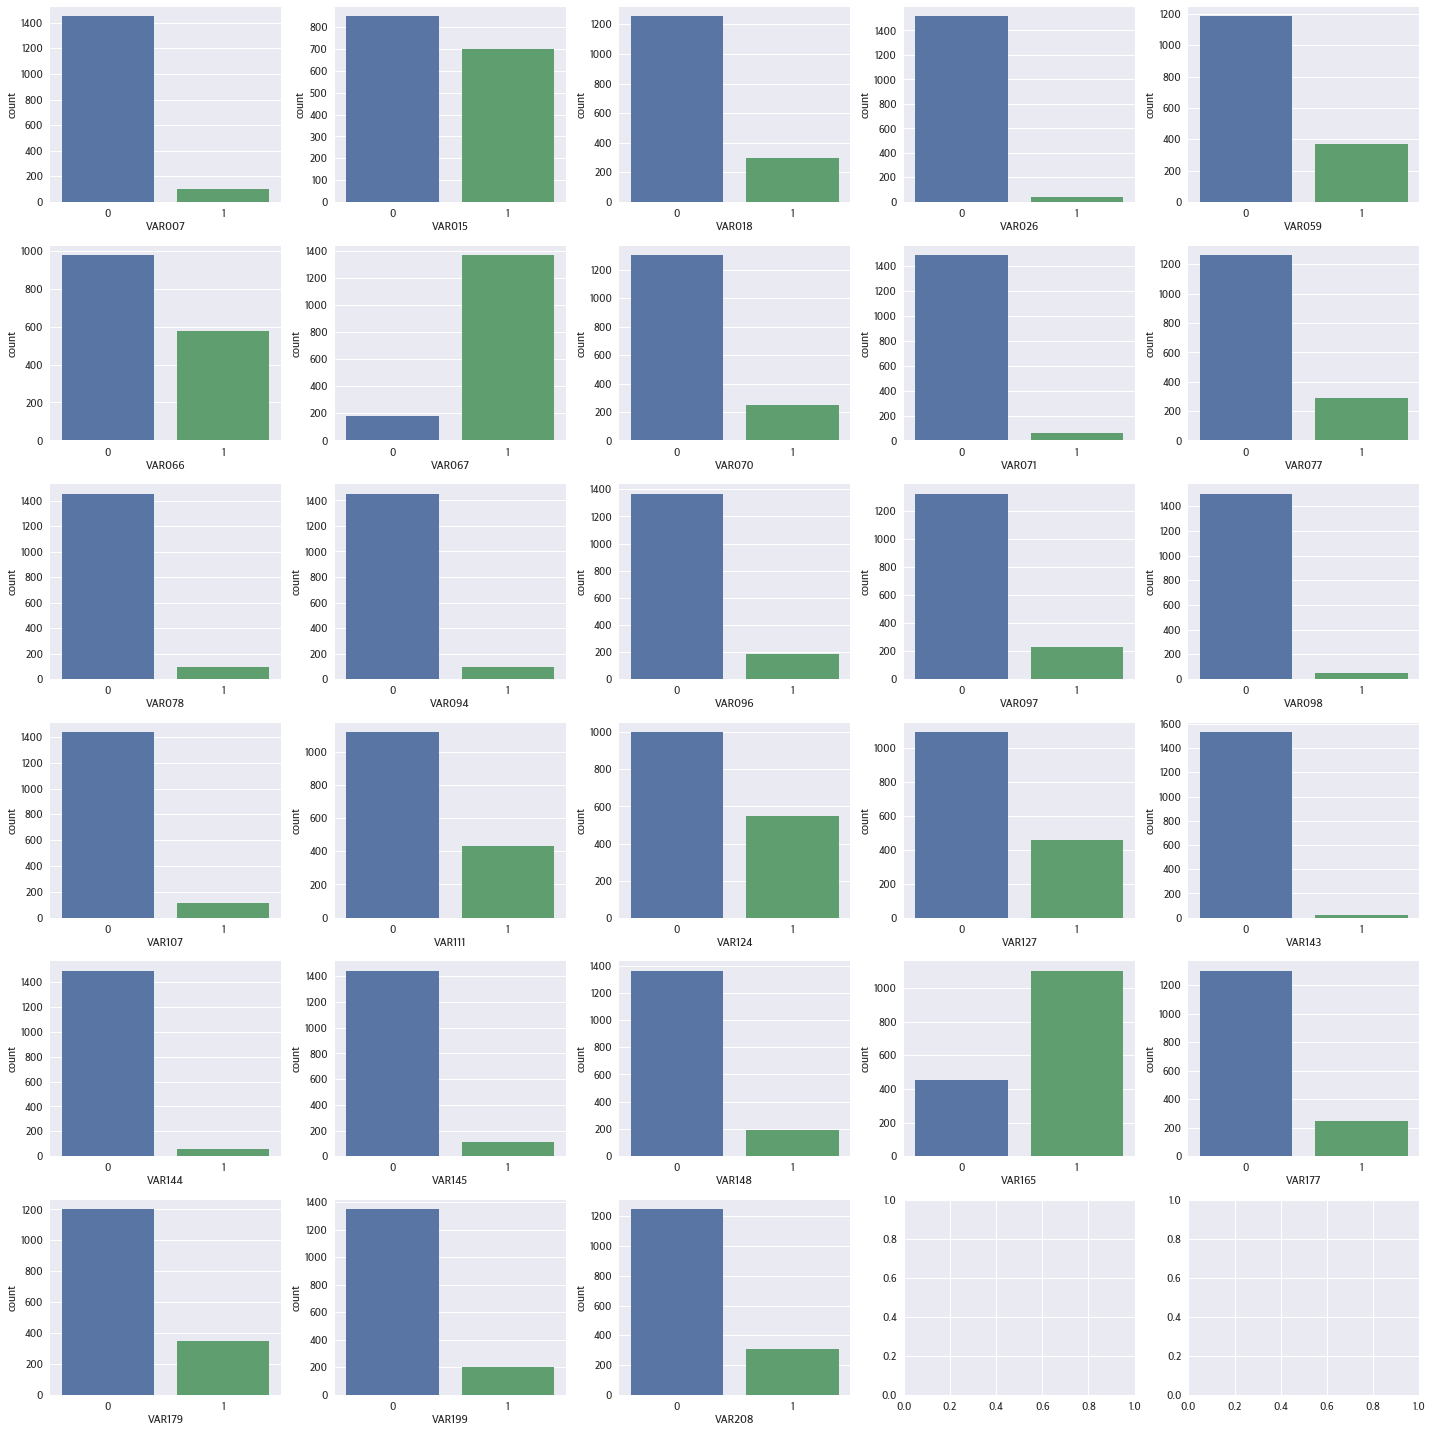

In [59]:
showDist_VARcat(group=[6,7,8], save=True)

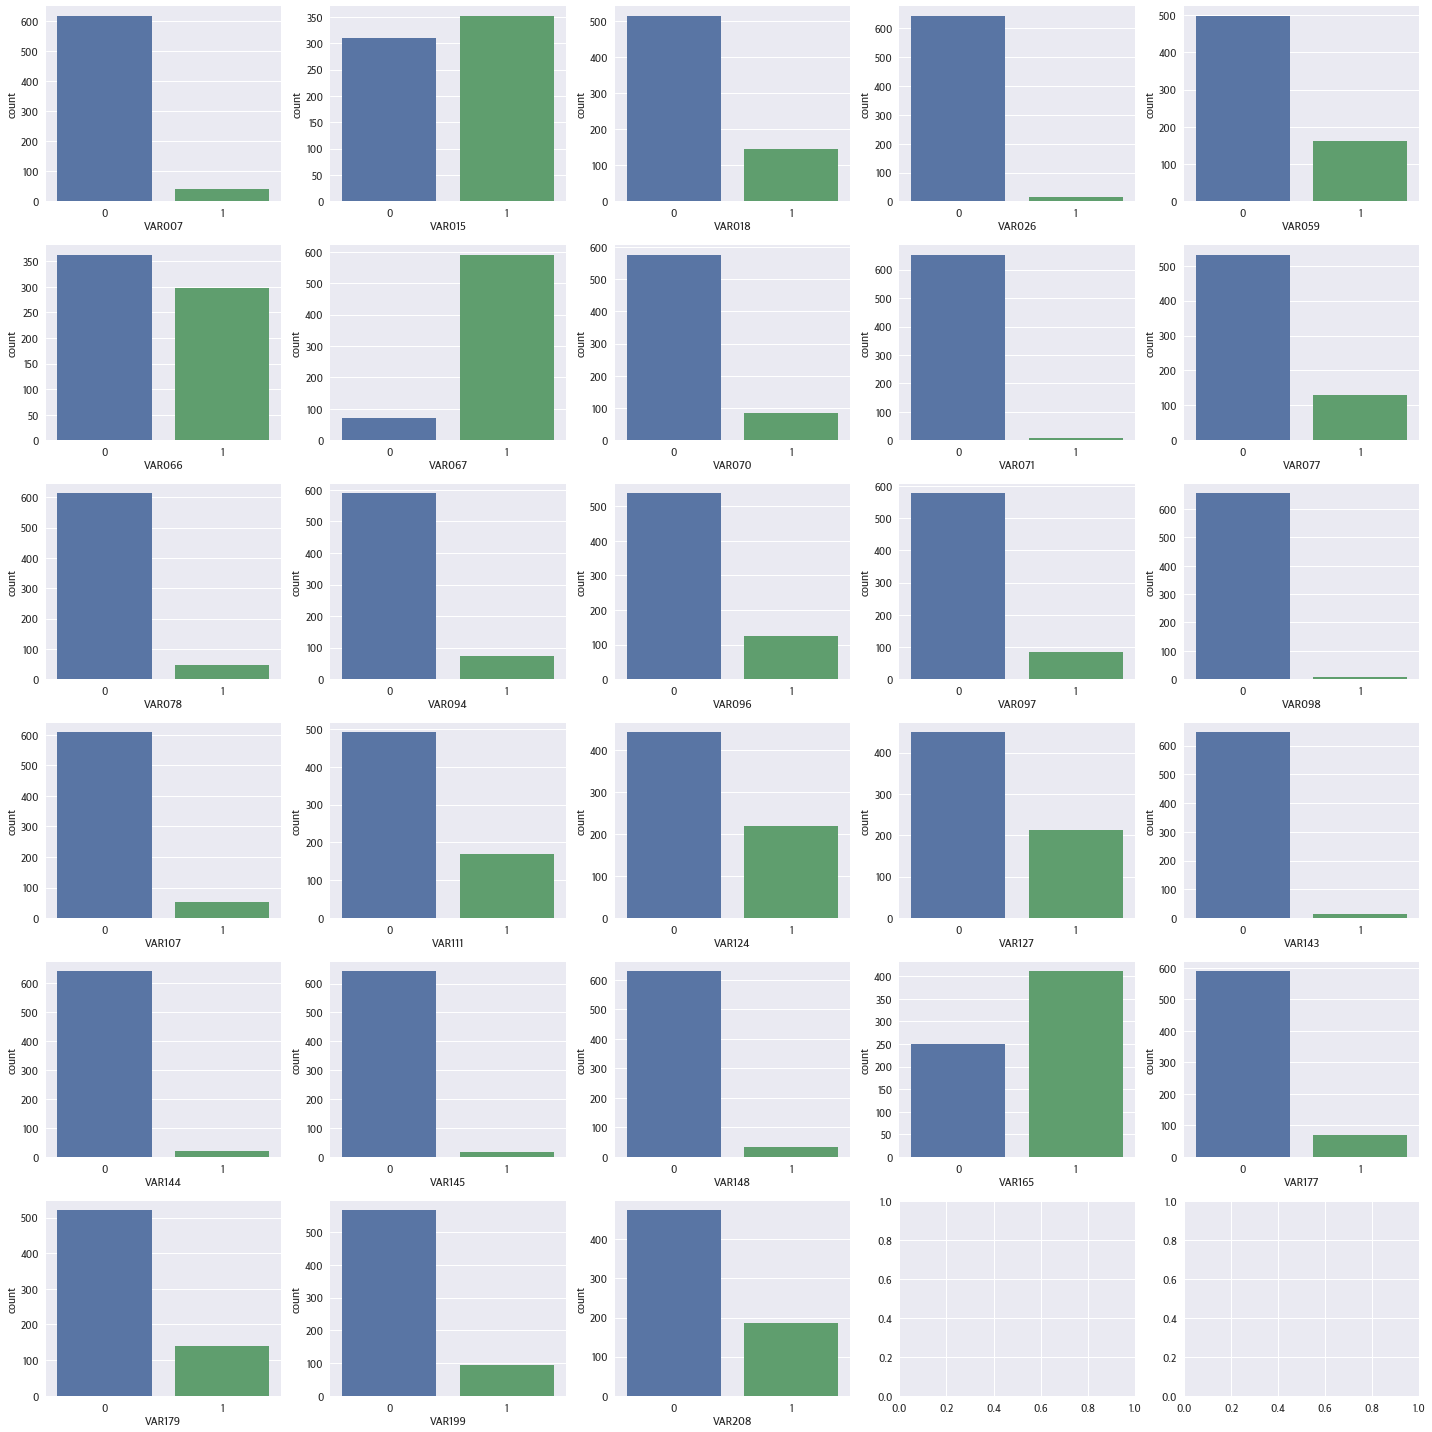

In [62]:
showDist_VARcat(group=[7], save=True)

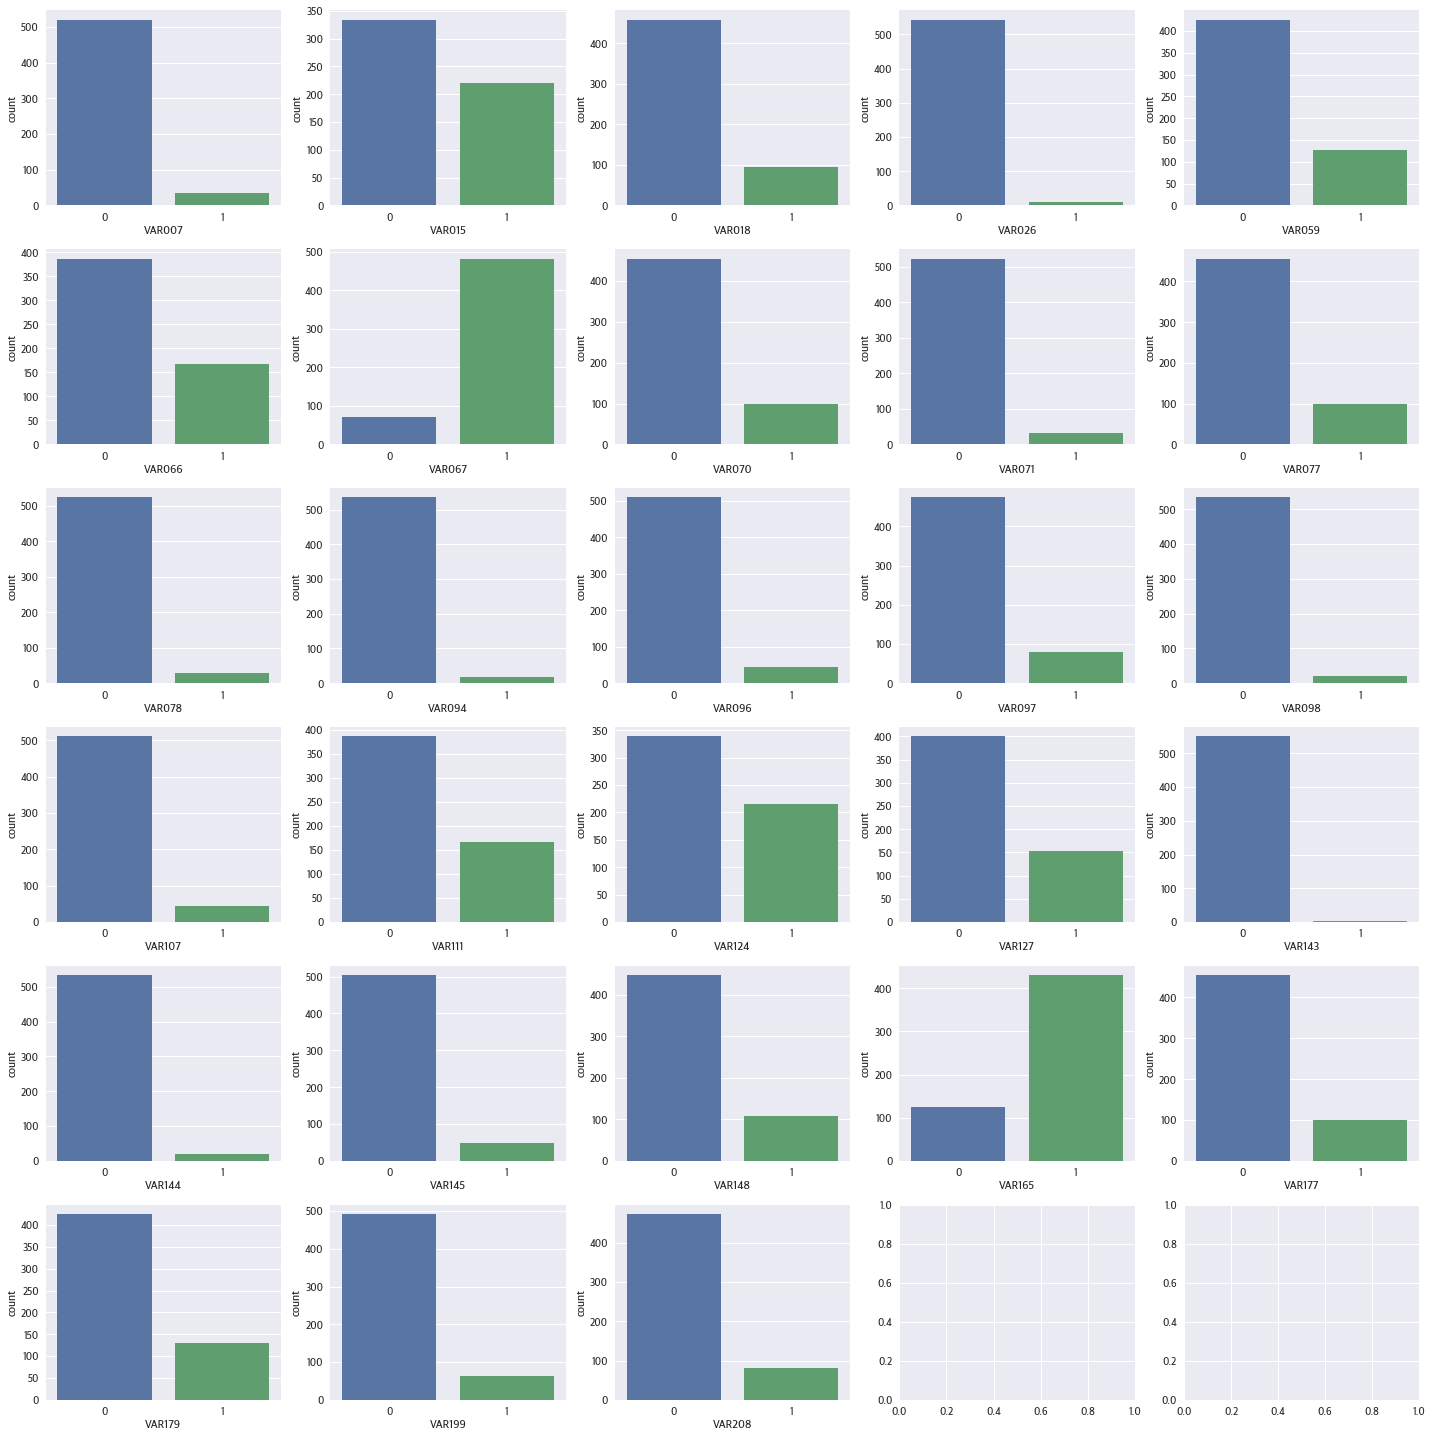

In [64]:
showDist_VARcat(group=[6], save=True)

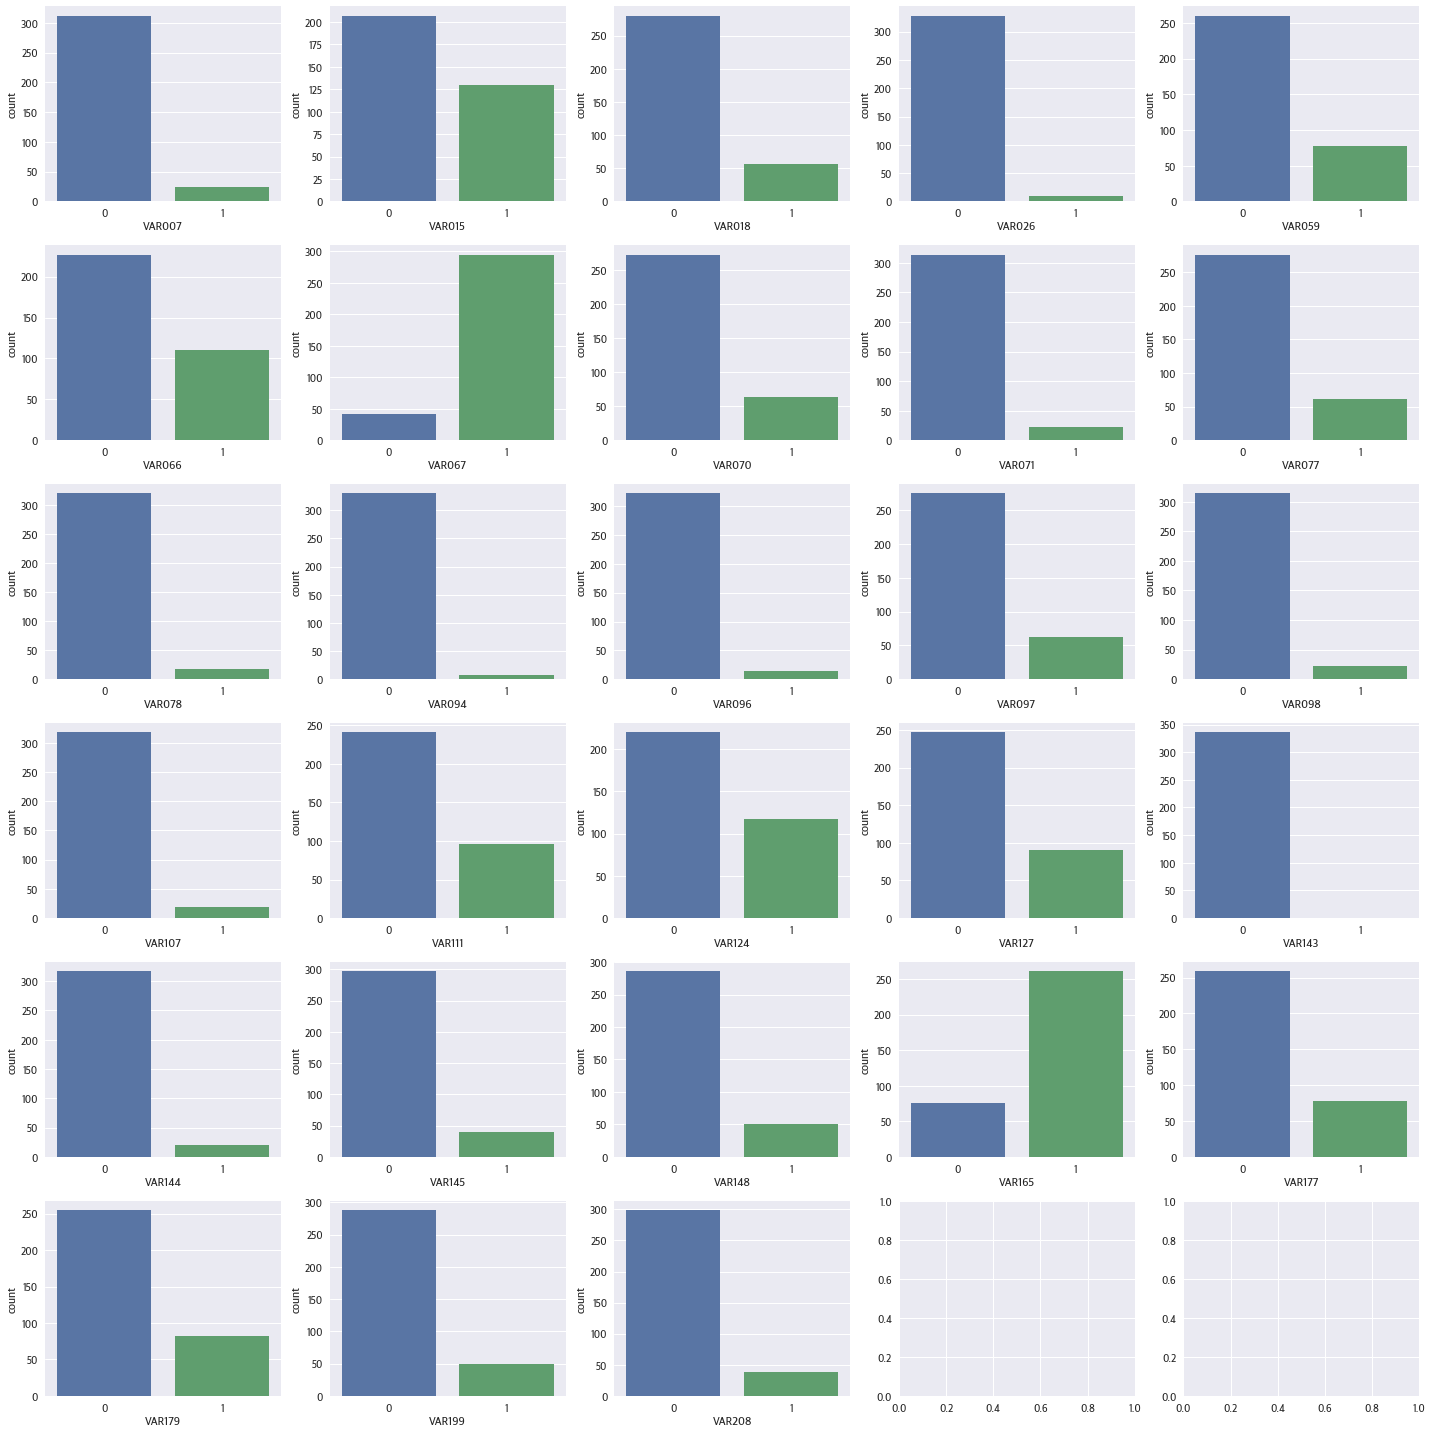

In [65]:
showDist_VARcat(group=[8], save=True)

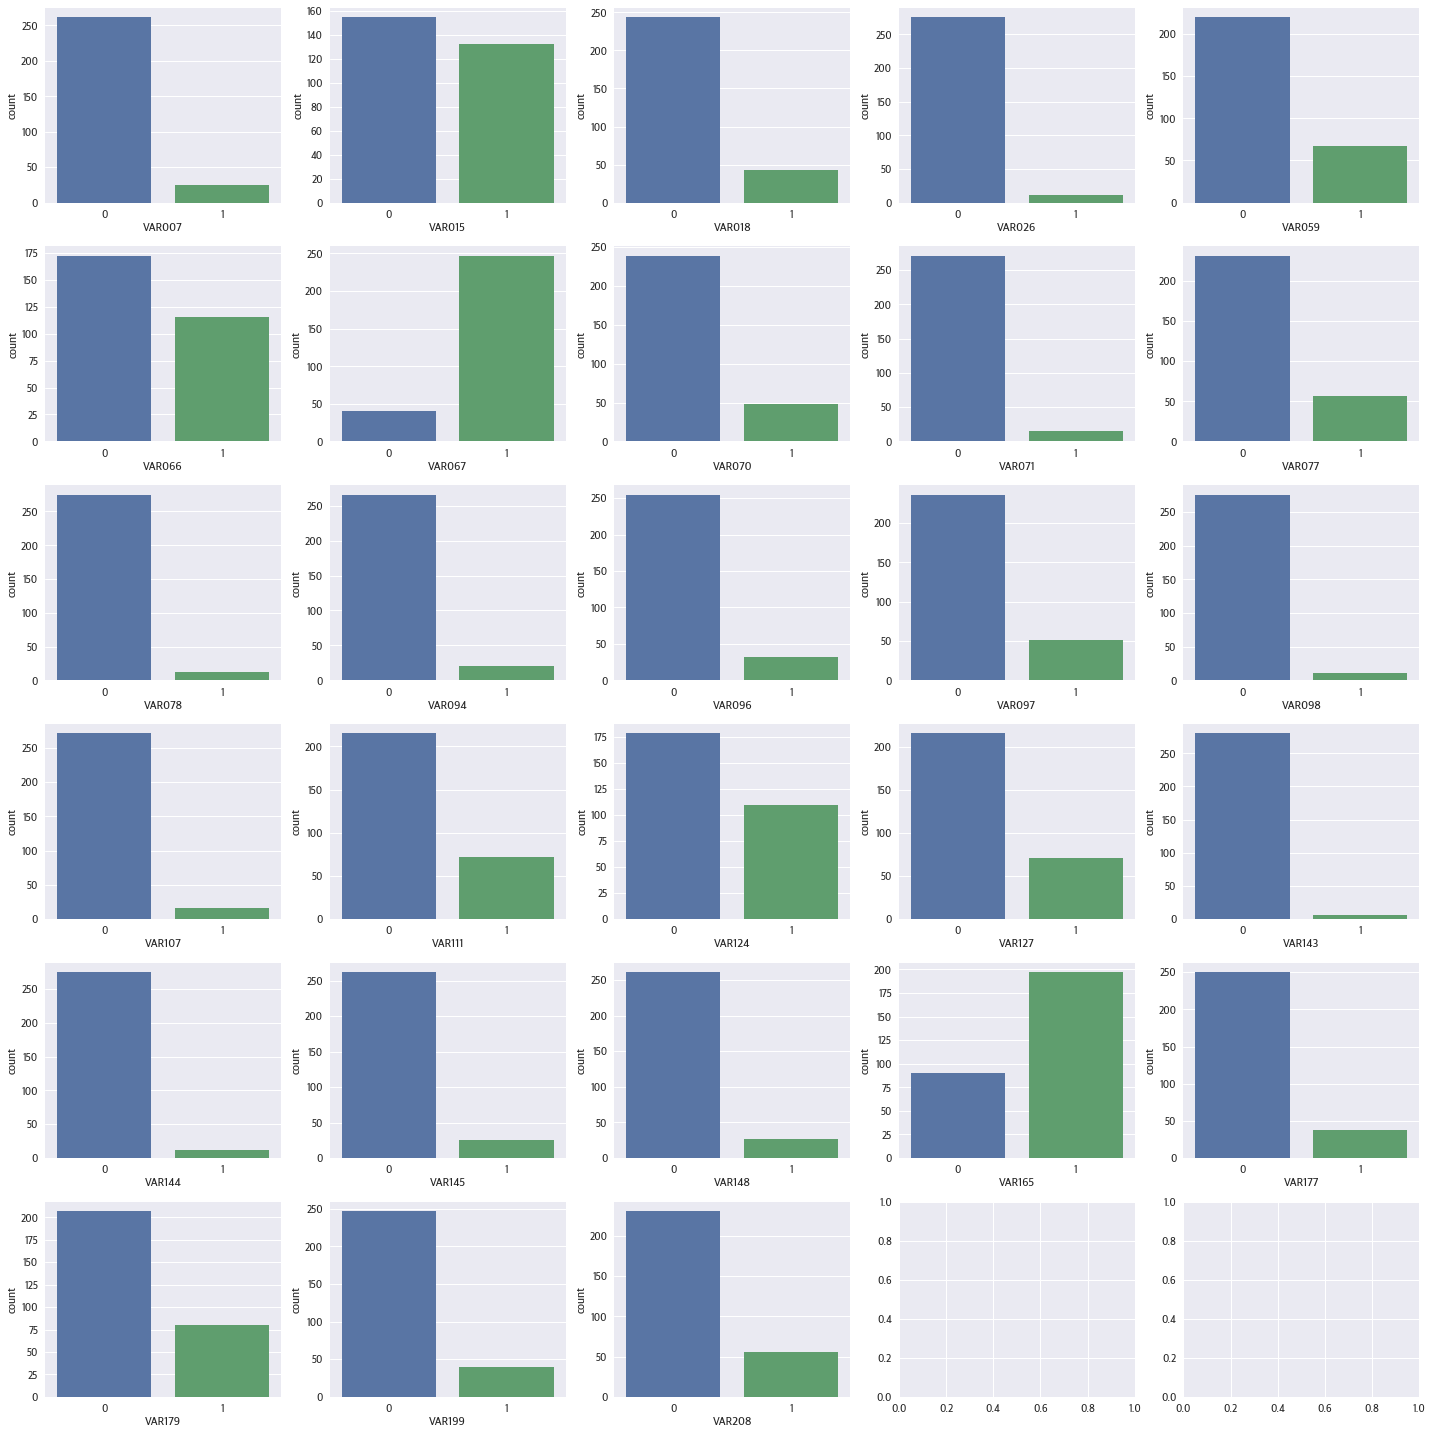

In [61]:
showDist_VARcat(group=[1,5,9], save=True)

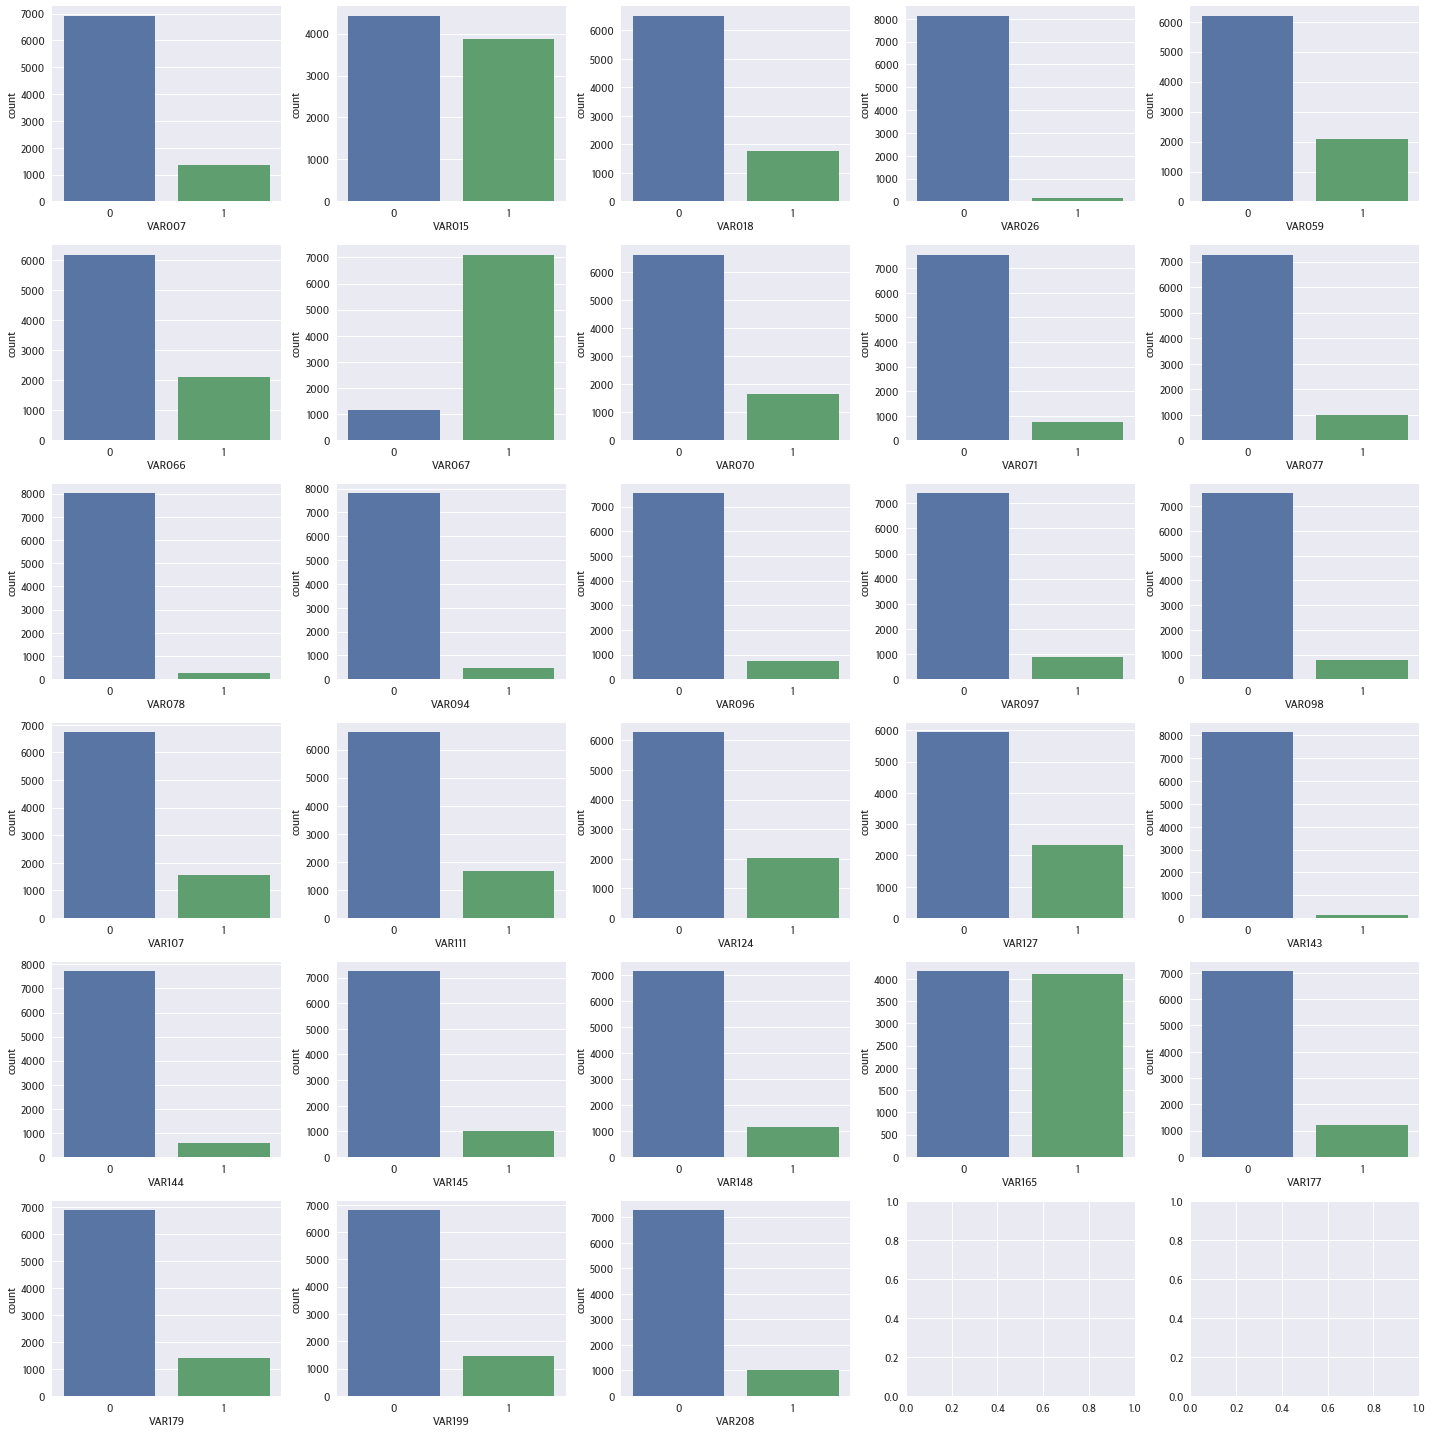

In [63]:
showDist_VARcat(group=[1,5,6,7,8,9], save=True, complement=True)

## Track 2
trend_w_demo.csv: 온라인 가맹점 업종 정보

<u>Description</u>
> YM: 이용 연월(2019년 4월\~2020년 5월)  
Category: 이용 업종  
성별구분: 0(남성), 1(여성)  
연령대: 연령 구간. 알파벳 순서와 연령 순서는 무관.<- 뭐냐...  
기혼스코어: 카드 이용 고객이 기혼일 확률  
유아자녀스코어: 카드 이용 고객이 유아자녀가 있을 확률  
초등학생자녀스코어: 카드 이용 고객이 초등학생 자녀가 있을 확률  
중고생자녀스코어: 카드 이용 고객이 중고생 자녀가 있을 확률  
대학생자녀스코어: 카드 이용 고객이 대학생 자녀가 있을 확률  
전업주부스코어: 카드 이용 고객이 전업주부일 확률  

In [12]:
trend_w_demo = pd.read_csv(pathList[-3], engine='python')
trend_w_demo.head(3)

YM Category  성별구분 연령대 기혼스코어 유아자녀스코어 초등학생자녀스코어 중고생자녀스코어 대학생자녀스코어 전업주부스코어
0  202005      할인점     0   F  high     low      high      mid      low     low
1  202005       취미     0   B  high     low       mid      mid      low     low
2  202005  오픈마켓/소셜     1   D   mid     mid       mid      mid      low     mid

In [123]:
def showCountplot(y, data, order=None, palette=None, title=None, 
                  xlabel=None, ylabel=None, figsize=(10, 6), yticks=None,
                  xticks=None, save=False):
    f = plt.figure(figsize=figsize)
    sns.countplot(y=y, data=data, order=order)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if yticks is not None:
        plt.yticks([i for i in range(data[y].nunique())], yticks)
    plt.title(title)
    plt.show()
    if save:
        f.savefig(f'./plots/{title}.png', dpi=300)

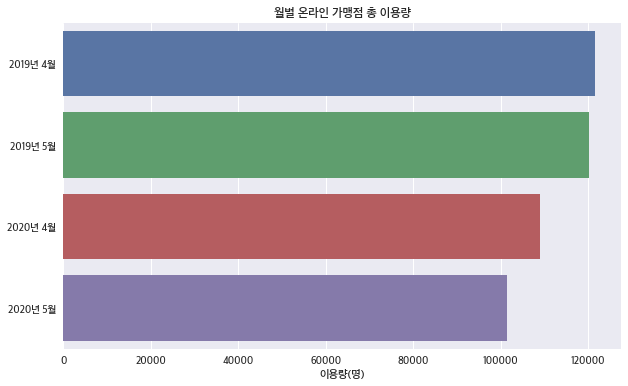

In [124]:
showCountplot(y='YM', data=trend_w_demo, order=trend_w_demo['YM'].value_counts().index,
             title='월별 온라인 가맹점 총 이용량', xlabel='이용량(명)',
             yticks=['2019년 4월', '2019년 5월', '2020년 4월', '2020년 5월'], save=True)

Text(0.5, 1.0, '연도별 온라인 가맹점 총 이용량')

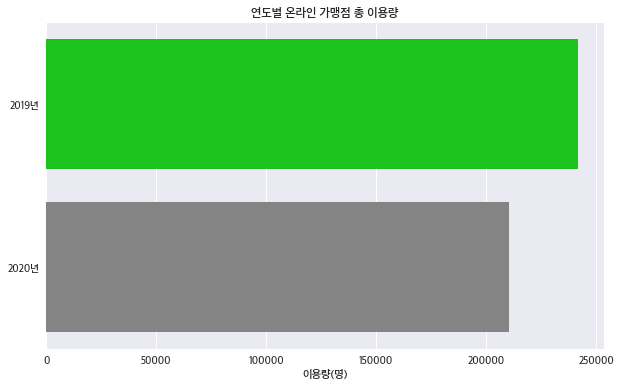

In [125]:
temp = trend_w_demo[['YM']].copy()
temp['YM'] = temp['YM'].apply(lambda x: str(x)[:4])

plt.figure(figsize=(10,6))
sns.countplot(y='YM', data=temp,
              order=temp['YM'].value_counts().index,
              palette=['#01DF01', '#848484'])
plt.yticks([i for i in range(2)], ['2019년', '2020년'])
plt.ylabel('')
plt.xlabel('이용량(명)')
plt.title('연도별 온라인 가맹점 총 이용량')

코로나의 영향 탓인지, 이용량이 줄었음

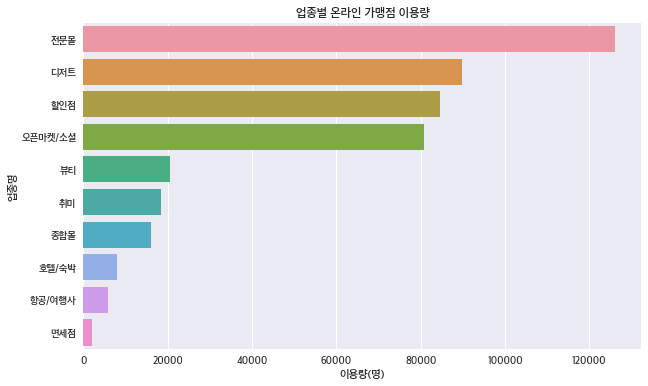

In [126]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=trend_w_demo, 
              order=trend_w_demo['Category'].value_counts().index)
plt.ylabel('업종명')
plt.xlabel('이용량(명)')
plt.title('업종별 온라인 가맹점 이용량')
plt.show()

일상에 가까울 수록 역시나 이용량이 많음

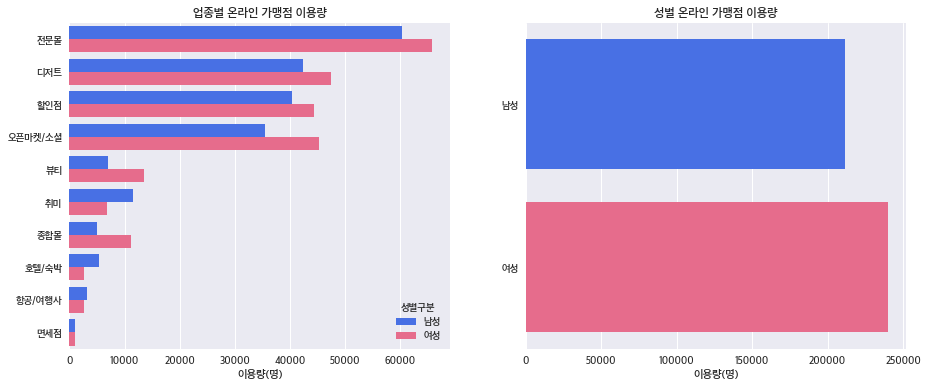

In [127]:
temp = trend_w_demo[['Category', '성별구분']].copy()
male_idx = temp[temp['성별구분'] == 0].index
temp['성별구분'] = '여성'
temp.loc[male_idx, '성별구분'] = '남성'

colors=['#2E64FE', '#FA5882']
f, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(y='Category', hue='성별구분', data=temp, 
              order=temp['Category'].value_counts().index,
              palette=colors,
              ax=ax[0])
sns.countplot(y='성별구분', data=temp, palette=colors, ax=ax[1])
ax[0].set_title('업종별 온라인 가맹점 이용량')
ax[1].set_title('성별 온라인 가맹점 이용량')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].set_xlabel('이용량(명)')
ax[1].set_xlabel('이용량(명)')

plt.show()

취미, 호텔/숙박, 항공/여행사를 제외한 모든 업종에서 여성 고객이 많음

Text(0.5, 0, '고객 수(명)')

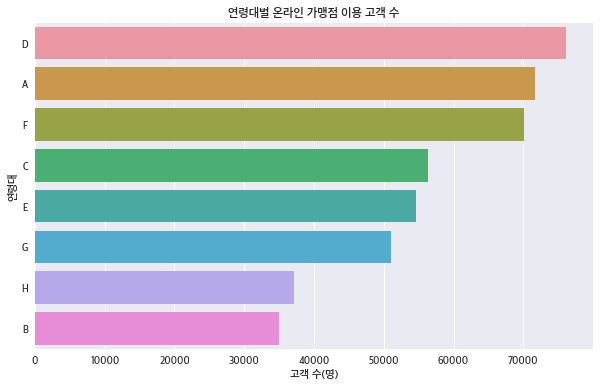

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(y='연령대', data=trend_w_demo,
             order=trend_w_demo['연령대'].value_counts().index)
plt.title('연령대별 온라인 가맹점 이용 고객 수')
plt.xlabel('고객 수(명)')

연령대 유추..? 기혼 확률을 살펴보면 정확한 연령대는 알 수 없지만 범위를 좁힐 수는 있을 듯

In [190]:
temp = trend_w_demo[['연령대', '기혼스코어']].copy()
temp['Frequency'] = temp.index.tolist()
temp_pct = (temp
            .groupby(['연령대','기혼스코어'])
            .count()
            .groupby(level=0)
            .apply(lambda x: 100 * x / float(x.sum())))

In [245]:
def showScore(feature='기혼스코어', hue='연령대', hue_name=None, figsize=(10,6), save=False):
    '''
    어떤 범주별 어떤 스코어에 대한 응답자 비율 plot을 반환
    feature: string, 관찰할 스코어 변수
    hue: string, 구분할 범주형 변수
    hue_name: plot의 title에 표시되는 이름, None일 시 hue로 대체됨
    figsize: tuple, plot 크기
    save: 저장 여부
    '''
    temp = trend_w_demo[[hue, feature]].copy()
    temp['Frequency'] = temp.index.tolist()
    temp_pct = (temp
            .groupby([hue, feature])
            .count()
            .groupby(level=0)
            .apply(lambda x: 100 * x / float(x.sum()))
            .reset_index())
    
    f = plt.figure(figsize=figsize)
    sns.barplot(x=hue, 
            y='Frequency', 
            hue=feature, 
            hue_order=['high', 'mid', 'low'],
            palette=['#FF0040', '#01DF01', '#0174DF'],
            data=temp_pct, 
            )
    plt.ylabel('응답자 비율(%)')
    if hue_name is None:
        plt.title(f'{hue}별 {feature}')
        plt.xlabel(hue)
    else:
        plt.title(f'{hue_name}별 {feature}')
        plt.xlabel(hue_name)
    if hue == '성별구분':
        plt.xticks([0,1], ['남성', '여성'])
    
    
    if save:
        if hue_name is None:
            f.savefig(f'../plots/{hue}별 {feature}.png', dpi=300)
        else:
            f.savefig(f'../plots/{hue_name}별 {feature}.png', dpi=300)

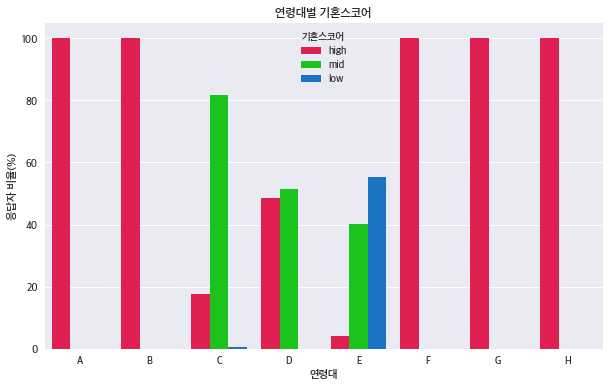

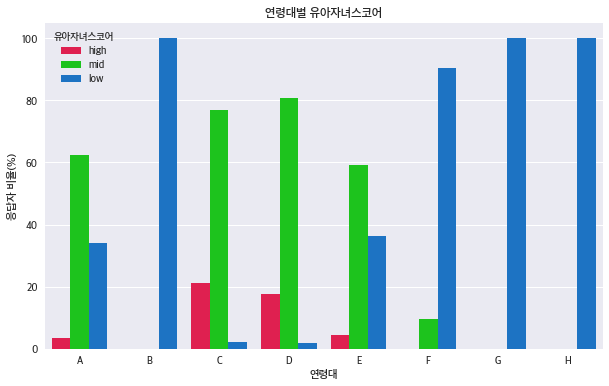

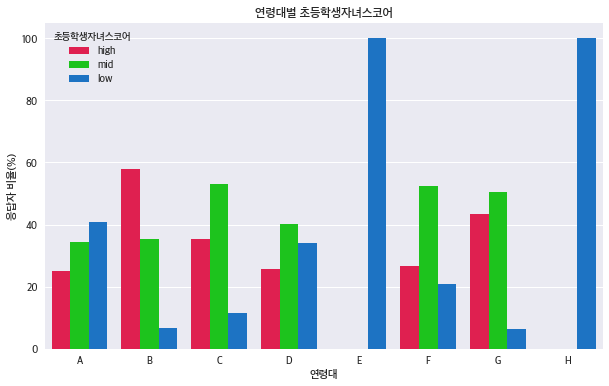

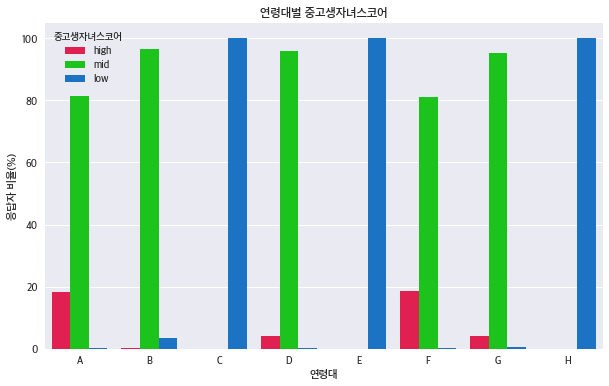

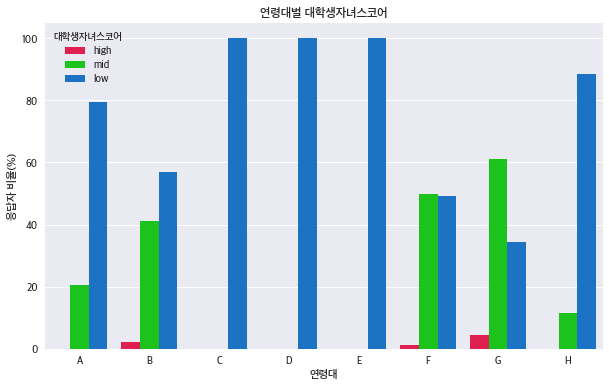

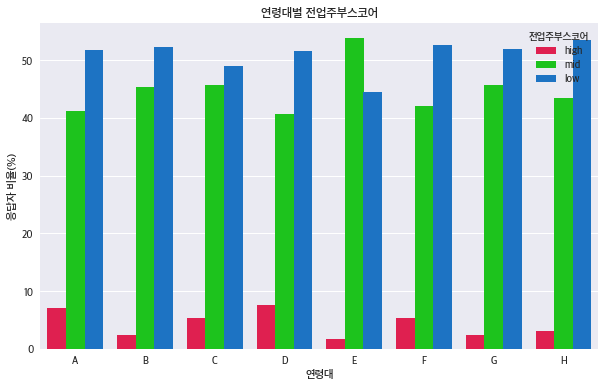

In [246]:
for score in list(trend_w_demo.columns[4:]):
    showScore(feature=score, hue='연령대', save=True)

C, D, E는 대학생 자녀를 지닐 만큼 나이대가 높진 않은듯, 기혼 확률도 낮고  
중고생 자녀를 살펴보면 이 셋중에 D가 나이대가 높은듯  
H도 지켜볼 필요가 있음. 기혼 확률은 높은데, 중고생 자녀까지 전부 low, 대학생 자녀 확률이 좀 있음.  
하지만 전업주부 스코어는 낮은 편

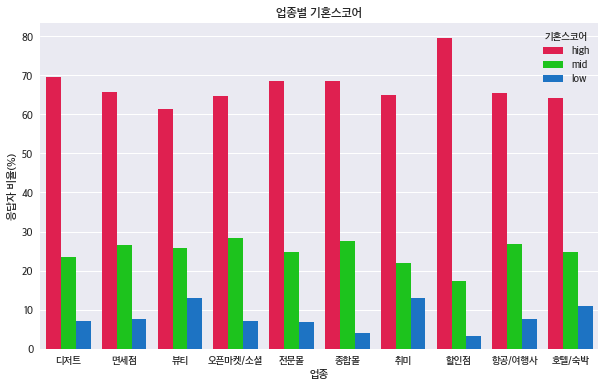

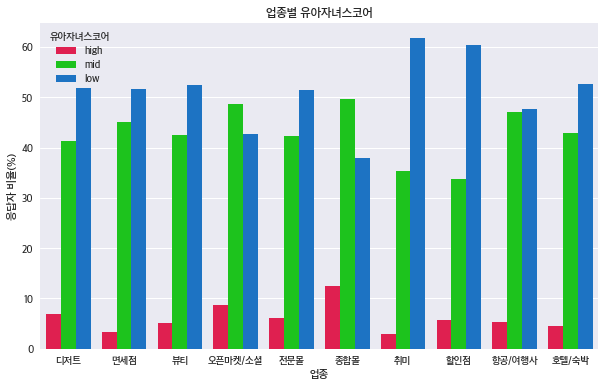

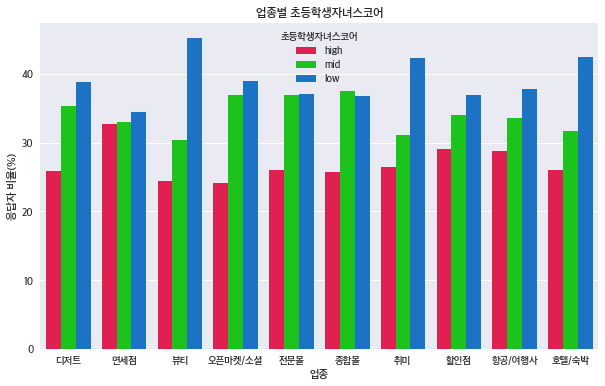

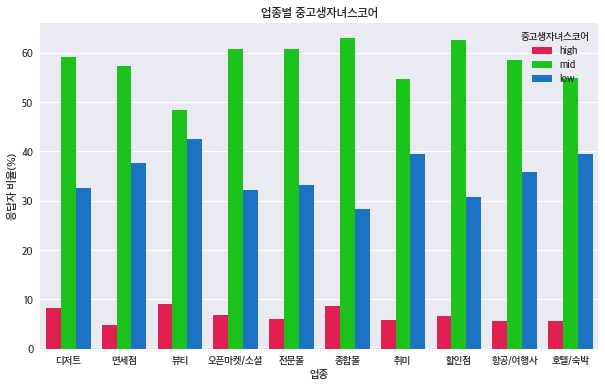

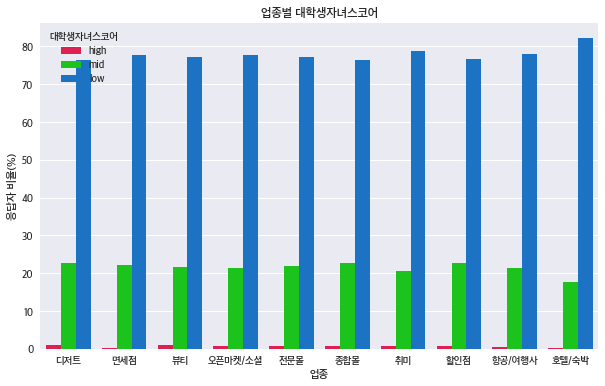

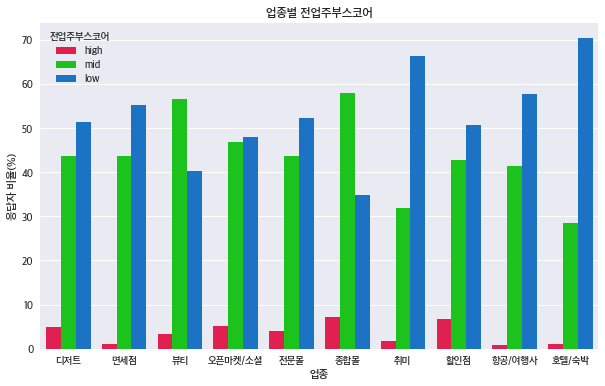

In [247]:
for score in list(trend_w_demo.columns[4:]):
    showScore(feature=score, hue='Category', hue_name='업종', save=True)

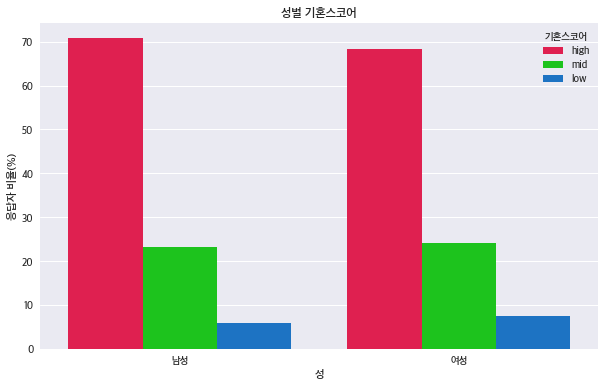

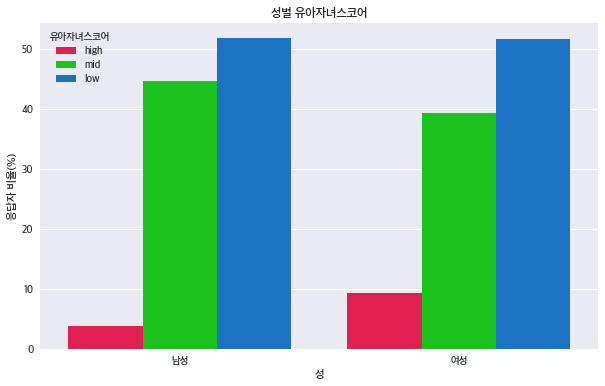

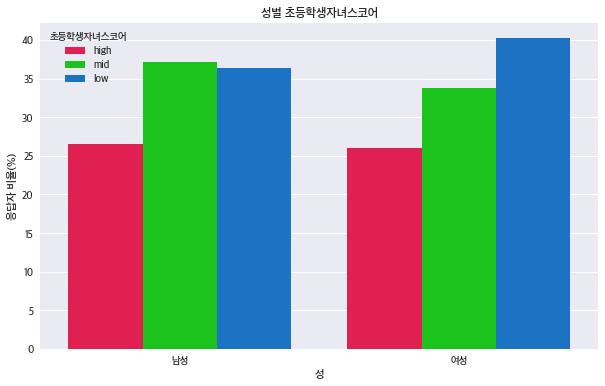

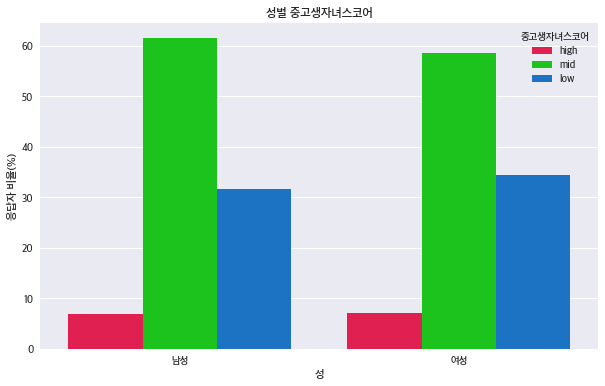

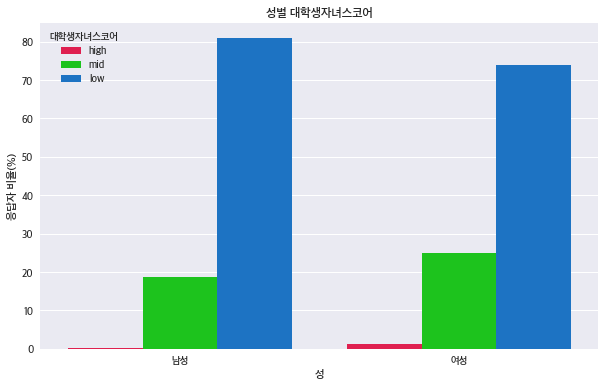

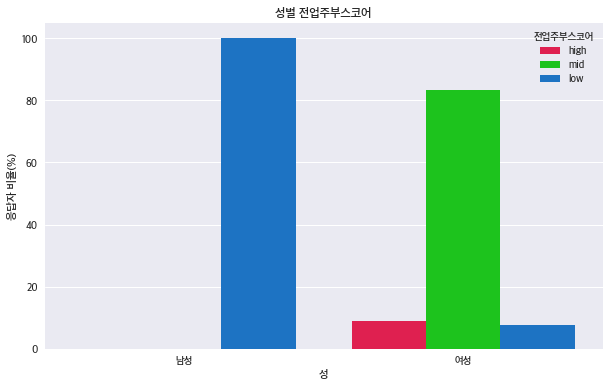

In [248]:
for score in list(trend_w_demo.columns[4:]):
    showScore(feature=score, hue='성별구분', hue_name='성', save=True)